<h1 align="center" style="font-family:times-new-roman">INFO284</h1> 
<h2 align="center" style="font-family:times-new-roman">Machine learning</h2> 
<h2 align="center" style="font-family:times-new-roman">Semester Assignment</h2> 
<h2 align="center" style="font-family:times-new-roman">Machine learning models for classification, sentiment analysis and image recognition</h2> 
<h4 align="center" style="font-family:times-new-roman">Candidates </h4>
<h4 align="center" style="font-family:times-new-roman">109 117 188 123 </h4>
<h4 align="center" style="font-family:times-new-roman">Word count: 3300 </h4>

### Introduction

Machine learning is a subset of artificial intelligence allowing computers to learn from data, and make predictions and decisions without explicit programming for the given task. Machine learning has revolutionized many fields like natural language processing, classification and data analysis by automating tasks, making accurate and precise predictions. In this paper we will explore three different machine learning tasks: The edibility of mushrooms using a tabular dataset, performing sentiment analysis on norwegian text, and classifying images with a convolutional neural network.

We approach each task systematically, exploring the data, model selection, preprocessing for application of machine learning models, training, evaluation, and discussion. We aim to gain a deeper understanding of the theory behind machine learning, techniques, and how we can apply them to real-world problems.

In addressing the assigned tasks, our team collaborated by dividing the responsibilities, with each member focusing on specific aspects of the problems. We then combined the most effective elements of each individual's work to create a comprehensive model. Throughout the process, our team maintained open and effective communication, enabling us to work effectively.

## Imports for all tasks

In [ ]:
#task1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scipy
from sklearn.preprocessing import LabelEncoder

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate

#cross validation
from sklearn.model_selection  import cross_val_score as CVS

#task2
import pandas as pd
import numpy as np
import re
import spacy
import seaborn as sns
import string
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Embedding
from tensorflow.keras.regularizers import l2
from imblearn.under_sampling import RandomUnderSampler 
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import SpatialDropout1D
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import class_weight


#task3
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt
from termcolor import colored



/shared-libs/python3.10/py/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-01 16:49:13.716863: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 16:49:13.767233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 16:49:13.768014: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 16:49:14.757093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Important packages

In [ ]:
!pip install spacy
!pip install tensorflow 
#additional pip installs can be found in requirements.txt in case of any missing dependencies


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached MarkupSafe-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Not uninstalling markupsafe at /shared-libs/python3.10/py-core/lib/python3.10/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


# Task 1 - Machine Learning for Mushroom Edibility

Machine learning on tabular mushrooms
The dataset is made for classification and training of machine learning algorithms and models. It contains information about hypothetical mushrooms with binary data on their edibility and features such as cap shape, gill shape and odor. 
Since the dataset is binary, it can be processed with methods like one-hot-encoding to apply machine learning algorithms. Popular methods for binary classification include logistic regression, decision trees, random forests and support vector machines.

Choosing machine learning models
We used three different models to predict the edibility of the mushrooms in the dataset. The methods used were logistic regression, k-nearest neighbour and decision trees. We decided on the models because they are built for binary classification tasks and there is a lot of litterature and examples of these models. We did not use other popular models like support vector machines and random forests becuase we had no experience, in hindisght, we could easily include these models too, but the task would be too large to fit the requirements.

k-nearest neighbour

kNN is an instance-based, non-parametric algorithm. This means that the algorithm stores results and uses it to make predictions on new instances. Instance-based algorithms are easy and simple to implement, easily adapt to new data, and are able to handle non-linear decision boundaries, meaning they can be useful when the underlying relationship between features and target-variable are complex. This is not the case for the given dataset, but we thought it would be an easy introduction to the task

Logisitc Regression

Logistic regression is a popular machine learning algorithm under the supervised learning technique. Logistic regression uses a logistic function (sigmoid function) to map any value to 0 or 1, it is widely used in logistic regression for classification of binary outcomes. The function takes an input, in our case the input is the top 10 most indicative features of edibility. The function then does a calculation to place it on the scale of edibility, scoring between 0 and 1, with a threshold around 0.5.

Decision trees

Decision trees are a popular machine learning algorithm that can be used for binary classification tasks. The basic idea behind a decision tree is to recursively split the data into subsets based on the values of the input features, with the goal of creating a tree-like model that can predict the binary class label of new data based on the input feature values.

### Code for task 1

Exploratory data analysis

The goal of data exploration is to understand and identify correlations between the features and data variables. In our case, the target variable is the edibility of mushrooms. To better understand the dataset and what we were dealing with we used a variety of techniques and visualizations to gain more structured information about the dataset. The agaricus-lepiota.txt file was very helpful in this process. We learned the descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family, consisting of 8124 entries with 22 columns for the features of mushrooms. The column 'stalk-root' has some missing values for 2480 mushrooms. We generally assume these are not edible. The dataset is relatively balanced, consisting of 51.8% edible, and 49.2% poisonous mushrooms.

In [ ]:
#using pandas, we load the csv file
df = pd.read_csv('/work/agaricus-lepiota.csv')


In [ ]:
#before any analysis we name columns for later use and understanding featues
df.columns=["edibility","cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
            "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
            "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
            "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
            "ring-number", "ring-type", "spore-print-color", "population","habitat" ]

In [ ]:
#Intial anaylzing to better udnerstand the dataset - Display the first few rows of the dataset
print(df.head())

# Get the dimensions of the dataset
print("Dataset dimensions:", df.shape)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Get basic statistical information for each column
print(df.describe())


  edibility cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         e         x           s         y       t    a               f   
1         e         b           s         w       t    l               f   
2         p         x           y         w       t    p               f   
3         e         x           s         g       f    n               f   
4         e         x           y         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         b          k  ...                        s   
1            c         b          n  ...                        s   
2            c         n          n  ...                        s   
3            w         b          k  ...                        s   
4            c         b          n  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         

In [ ]:
#checking for missing values
df[df == "?"].count()

edibility                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

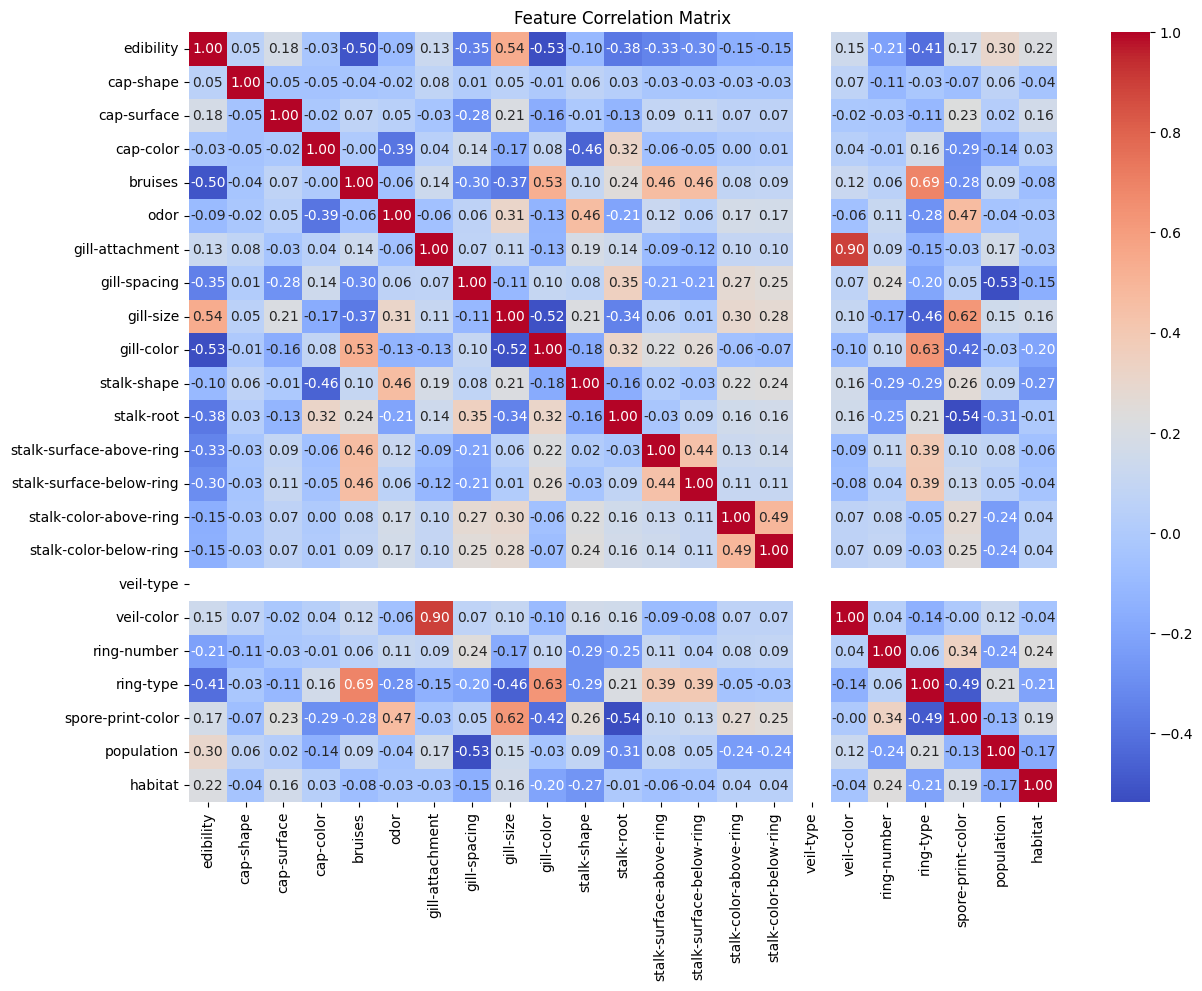

In [ ]:
# Encode categorical variables with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded1 = df.apply(le.fit_transform)

# Calculate the correlation matrix
corr_matrix = df_encoded1.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


#The txt file said there were missing values for stalk root identified by "?", therefore we check the dataframe, we keep a note of this during the visual data exploration.

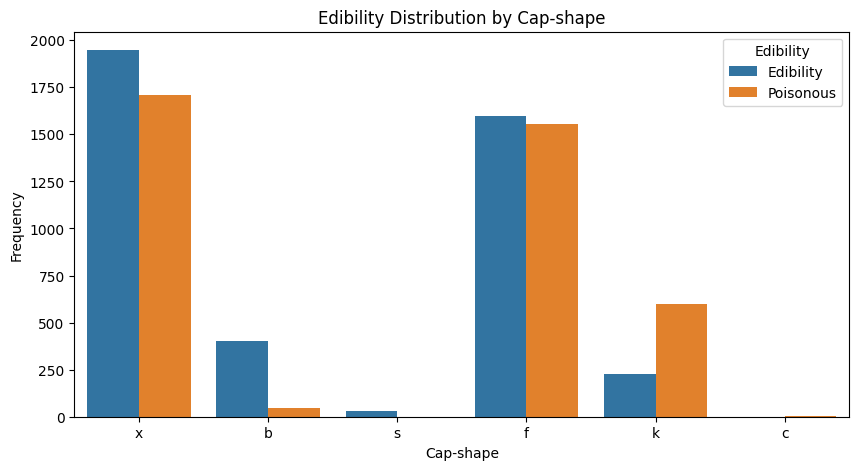

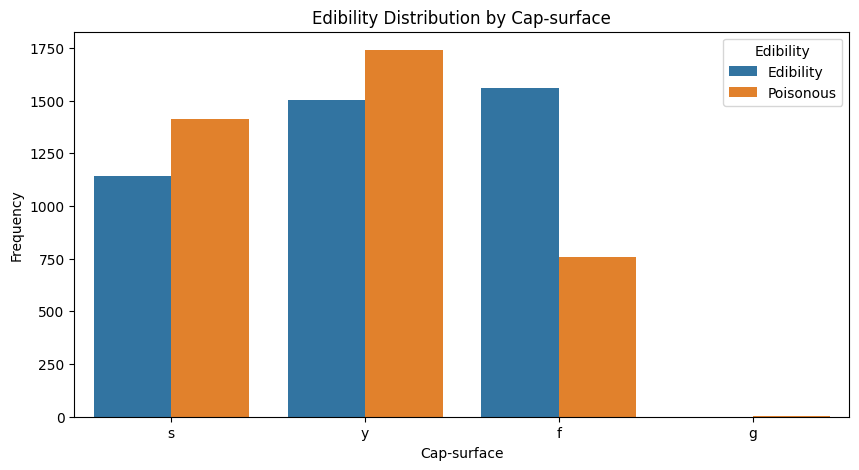

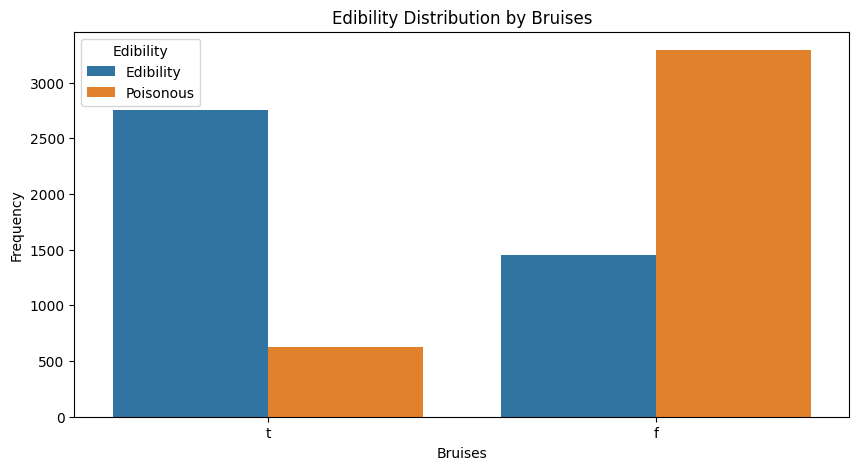

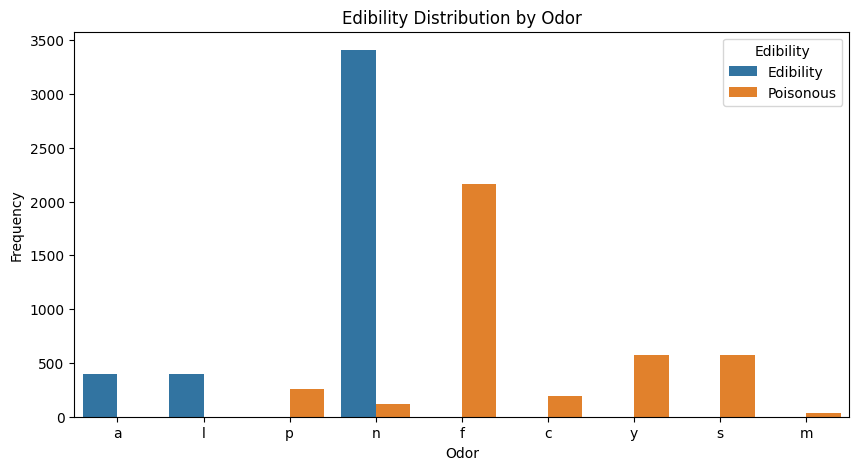

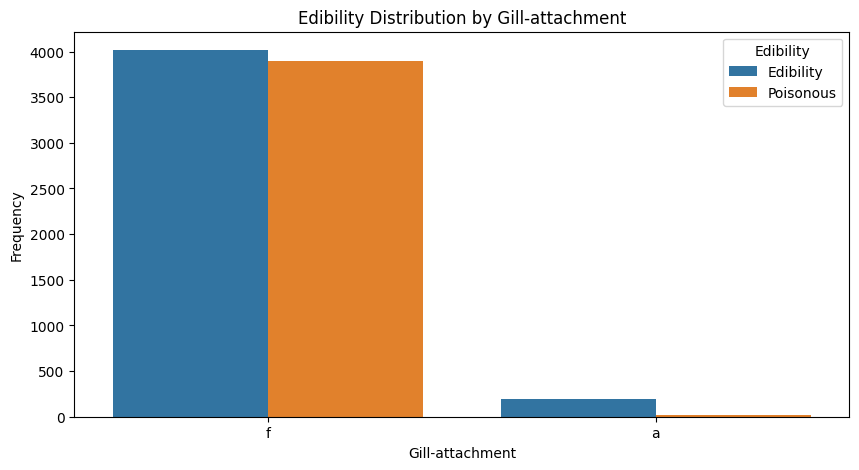

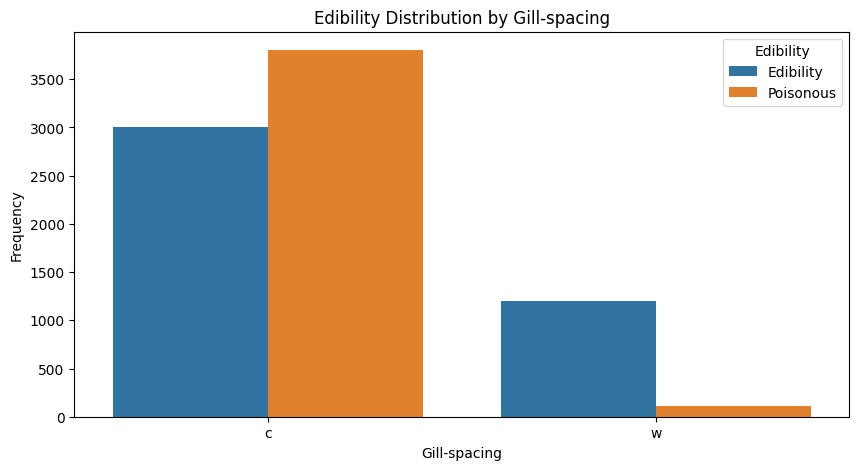

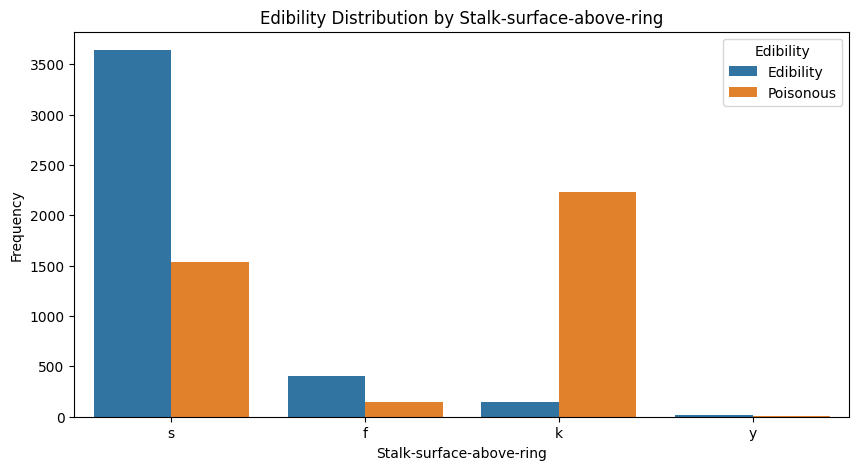

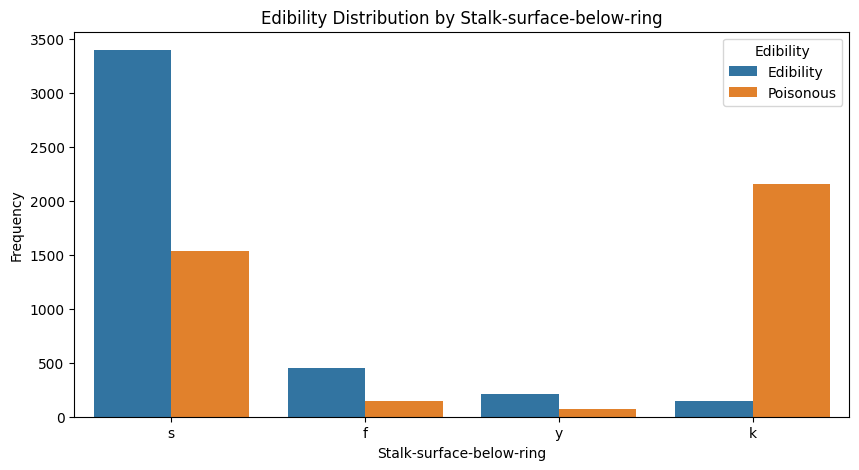

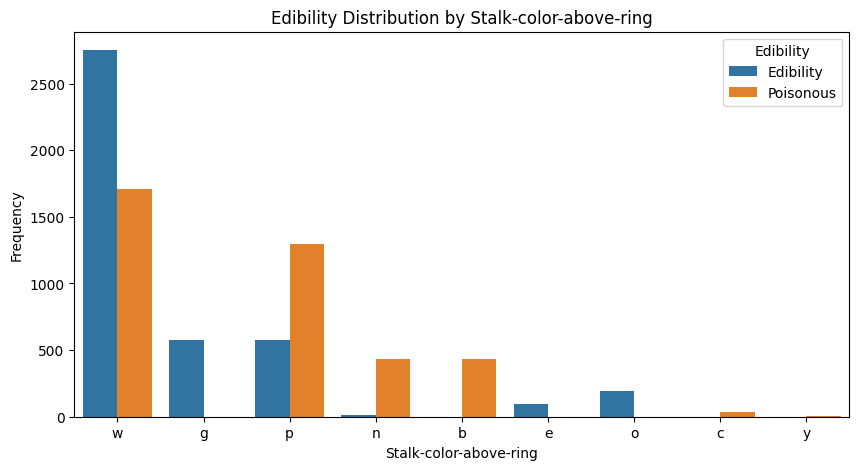

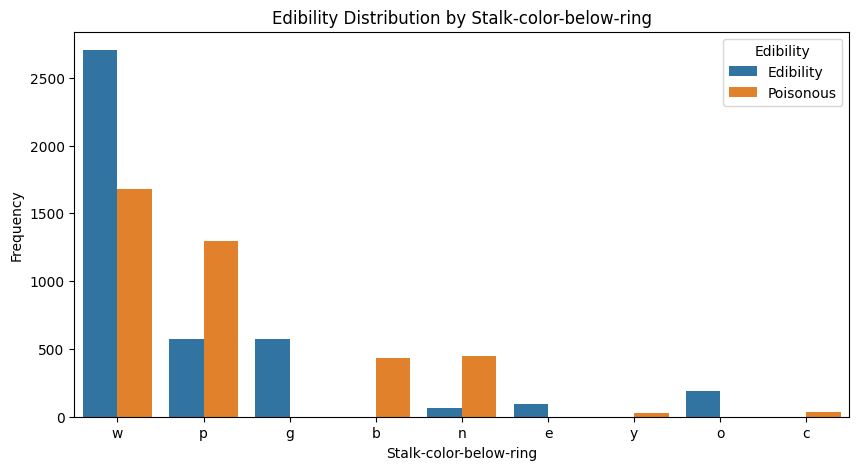

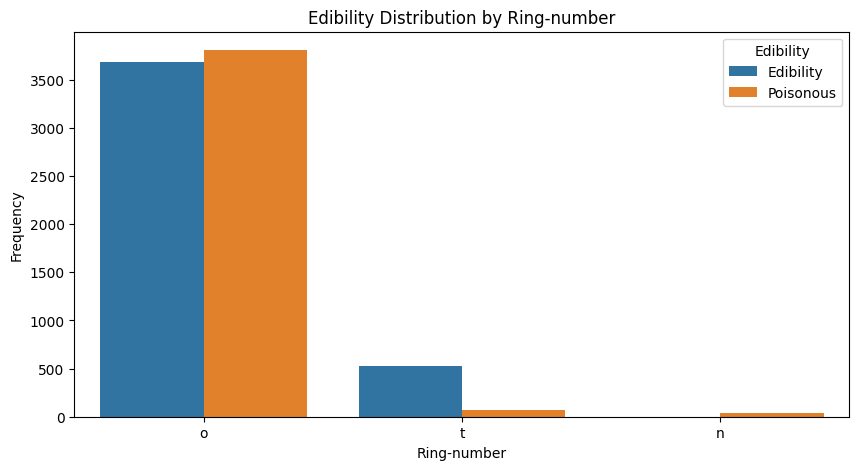

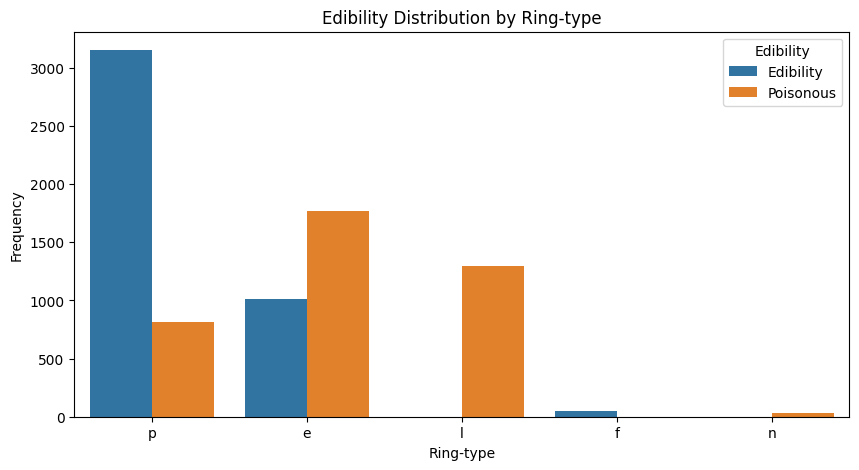

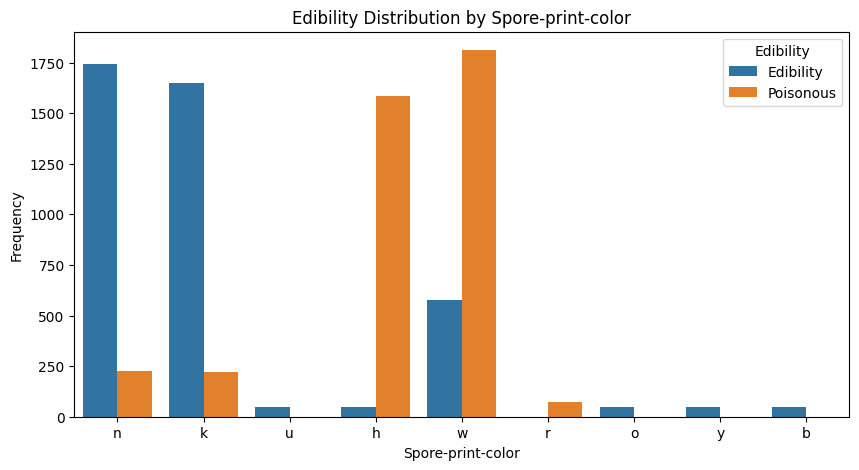

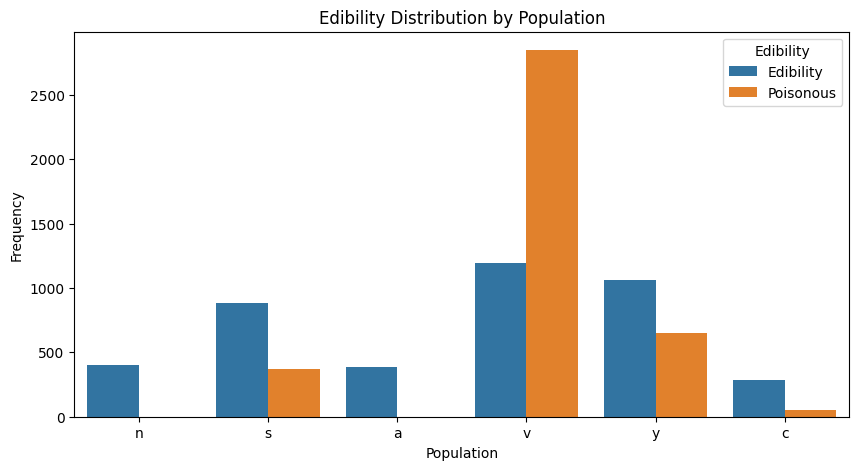

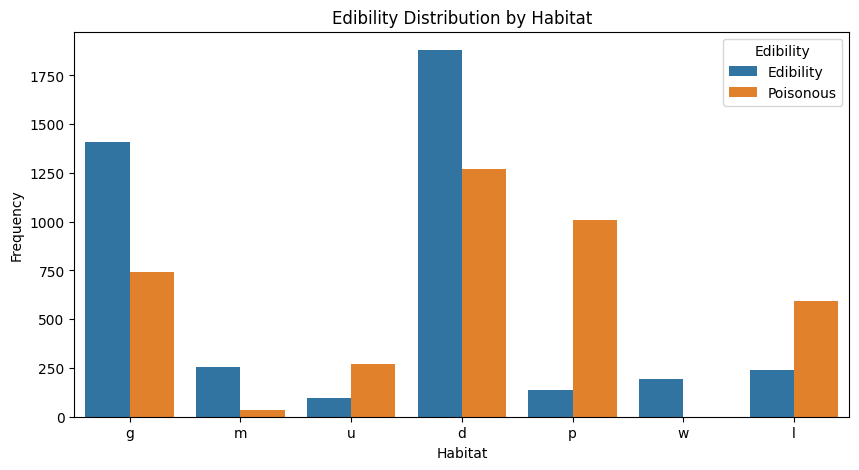

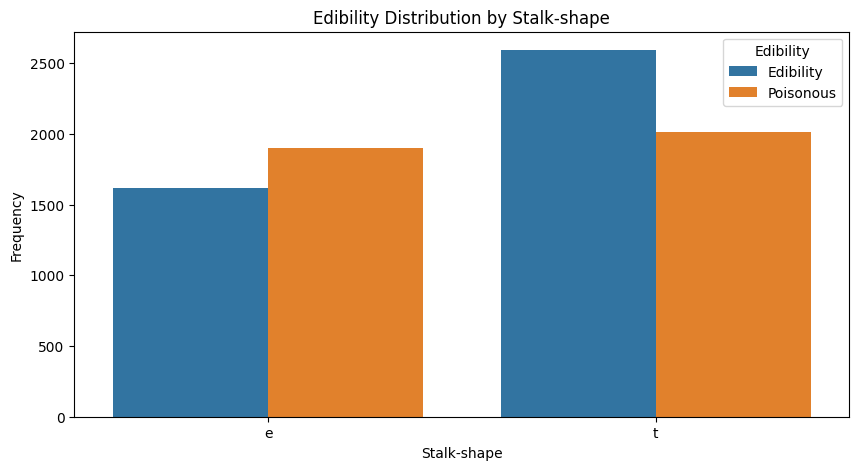

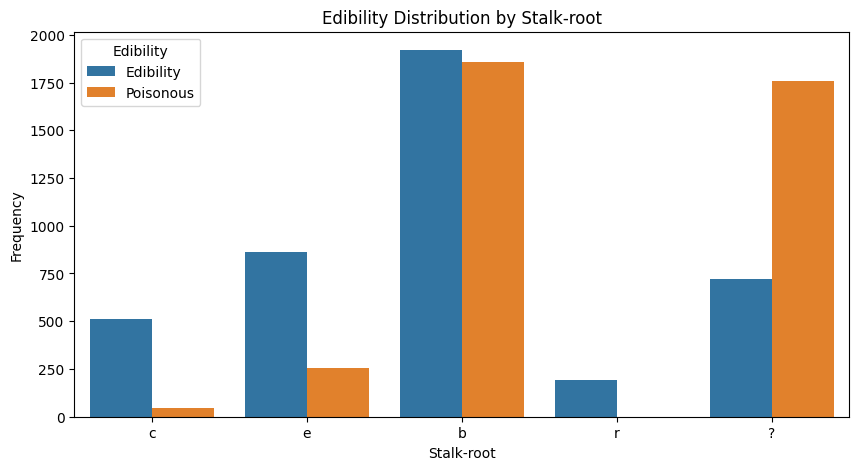

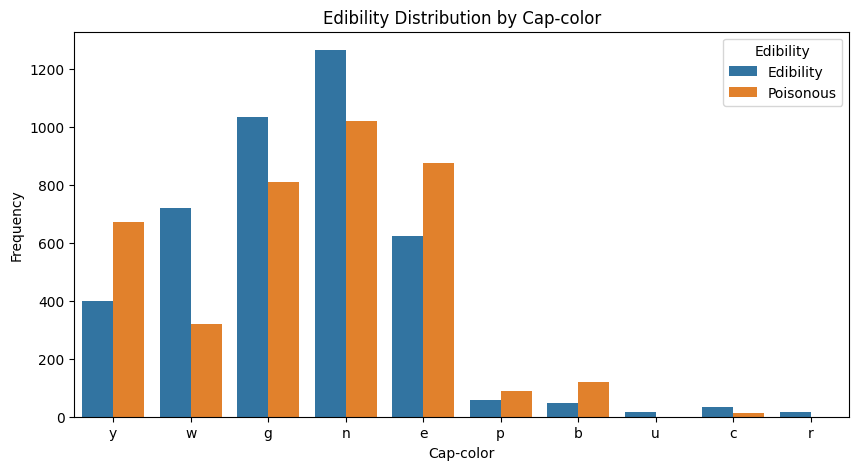

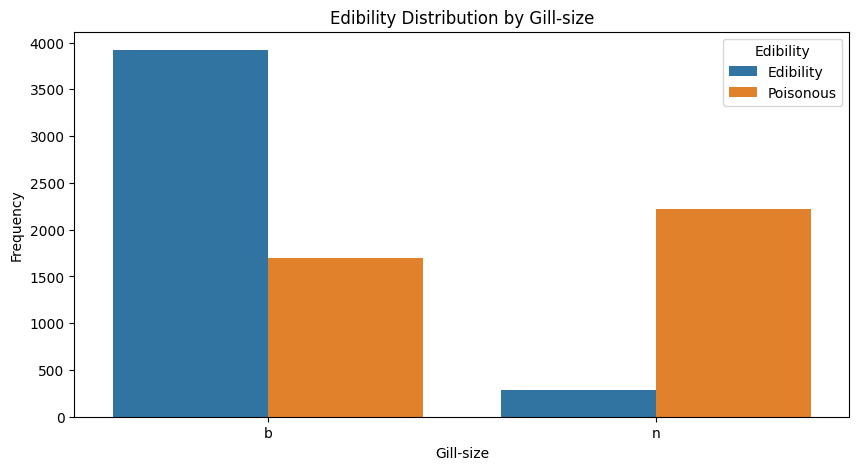

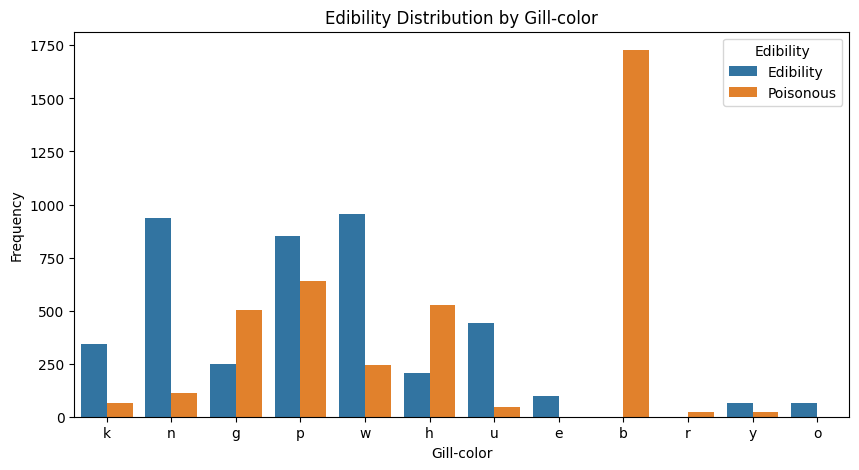

In [ ]:
# Explore the relationship between some features and edibility
features_to_explore = ['cap-shape', 'cap-surface', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat',"stalk-shape","stalk-root",
       "cap-color","gill-size", "gill-color"]

for feature in features_to_explore:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='edibility', data=df)
    plt.title(f'Edibility Distribution by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.legend(title='Edibility', labels=['Edibility','Poisonous'])
    plt.show()

Looking at the plots above, we can draw many interesting conclusions. We see that the unmarked stalk-root feature is a high indicator of being poisonous, especially interesting as 2480 entries have a stalk-root with unknown value. Another great observation is the odor. We also see several values in each column that indicate the mushroom is edible.

In [ ]:
print(df['edibility'].value_counts())

# Loop through each column and print the number of instances for each unique value in the column, grouped by class label
for col in df.columns:
    if col != 'edibility':
        print('\nColumn:', col)
        print(df.groupby(['edibility', col]).size())

e    4208
p    3915
Name: edibility, dtype: int64

Column: cap-shape
edibility  cap-shape
e          b             404
           f            1596
           k             228
           s              32
           x            1948
p          b              48
           c               4
           f            1556
           k             600
           x            1707
dtype: int64

Column: cap-surface
edibility  cap-surface
e          f              1560
           s              1144
           y              1504
p          f               760
           g                 4
           s              1411
           y              1740
dtype: int64

Column: cap-color
edibility  cap-color
e          b              48
           c              32
           e             624
           g            1032
           n            1264
           p              56
           r              16
           u              16
           w             720
           y             400
p  

The columns gave us interesting information about the features and the mushrooms. Using our graphs and our new information we can see that there are several columns we can drop.

Veil-type: Only one unique value for both edibility classes, does not give any useful information.

Cap shape: Cap shape has a relatively even distribution for each feature, therefore making it harder for the model to predict edibility.

Veil-color: The feature 'w' is almost the same for edibility and poisonous, hard to use.

### Code for machine learning model:

In [ ]:
#Dropping columns with little meaning/ipact
df = df.drop(["veil-type","veil-color","cap-shape"],axis=1)

columns_to_encode=['cap-surface', 'bruises', 'odor',
        'gill-spacing', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat',"stalk-shape","stalk-root",
       "cap-color","gill-size", "gill-color"]

#Encoding dummies for each feature, used for easier binary classifications
df_encoded = pd.get_dummies(df.drop('edibility', axis=1)[columns_to_encode], dtype=int)
df_processed = pd.concat([df[['edibility']], df_encoded], axis=1)
df_processed['edibility'] = df_processed['edibility'].replace({'e': 1, 'p': 0})
df_processed


,edibility,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,...,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y
0,1,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8119,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8120,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8121,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We one-hot encoded the labels to easily feed them to our classification algorithms. 

In [ ]:
#importing necessary libraries for models and split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#set the columns for the split
X = df_processed.drop("edibility", axis=1)
y = df_processed["edibility"]

#Encode the target variable
encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)

#Train test split, randomstate set to the answer of everything
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

#make the classification reports that show our results
def generate_classification_report(model, X, y, scoring_metrics, model_name):
    cv_results = cross_validate(model, X, y, scoring=scoring_metrics)
    report_df = pd.DataFrame(cv_results).iloc[:, 2:]
    report_df.columns = scoring_metrics
    report_df.index = [f'Valid{i+1}' for i in range(report_df.shape[0])]
    
    print(f"{model_name} Classification Report:\n")
    print(report_df, "\n\n")
    print("Mean Scores:\n")
    
    mean_scores = []
    for metric in scoring_metrics:
        mean_score = round(report_df[metric].mean(), 4)
        print(f"\t{metric}: {mean_score}")
        mean_scores.append(mean_score)
    
    return mean_scores
#Set scoring metrics and the models we want to use
scoring = ['accuracy', 'precision', 'recall', 'f1']
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))
]
#Print seperate results for each model
for model_name, model in models:
    generate_classification_report(model, X, y, scoring, model_name)
    print("\n" + "="*50 + "\n")


Above we finally compile and train/test our models. We print the scores in frames. The results were close to perfect for every fold! We added cross validation to improve our model accuracy, being sure of the results, and "removing" the need for a validation set.

## Task 1.2 - Features indicating edibility

For this task we are to find the most indicative features of edibility. To solve this we used the same model as before. We also performed a search for the features by just exploring variables and the number of cases those variables had.

Top indicative features for a mushroom being edible (using Logistic Regression):
                feature  importance
11               odor_n    3.293531
56  spore-print-color_r    2.478176
8                odor_f    2.058894
9                odor_l    1.984742
6                odor_a    1.897408
7                odor_c    1.872582
76         stalk-root_b    1.717891
90          gill-size_b    1.683963
91          gill-size_n    1.683891
12               odor_p    1.652585


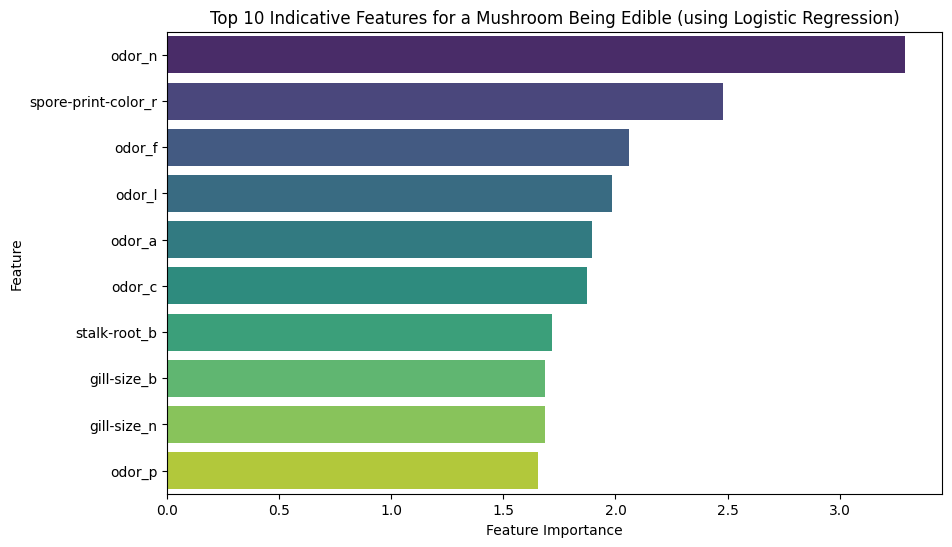

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Calculate feature importances using the coefficients of the logistic regression model
coefficients = lr.coef_.ravel()
importance_df = pd.DataFrame({'feature': X.columns, 'importance': np.abs(coefficients)})

# Sort the DataFrame by importance in descending order
importance_df_sorted = importance_df.sort_values(by='importance', ascending=False)

# Print the most indicative features
print("Top indicative features for a mushroom being edible (using Logistic Regression):")
print(importance_df_sorted.head(10))

# Get the top 10 features
top_features = importance_df_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')

# Set plot title and labels
plt.title('Top 10 Indicative Features for a Mushroom Being Edible (using Logistic Regression)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()


Alternative method using Decision trees (Hidden)

Top indicative features for a mushroom being edible (using Decision Tree):
                       feature  importance
11                      odor_n    0.646323
5                    bruises_t    0.152519
12                      odor_p    0.086636
8                       odor_f    0.059064
56         spore-print-color_r    0.033999
24  stalk-surface-below-ring_y    0.011244
46                 ring-type_e    0.004309
1                cap-surface_g    0.003932
4                    bruises_f    0.001938
91                 gill-size_n    0.000034


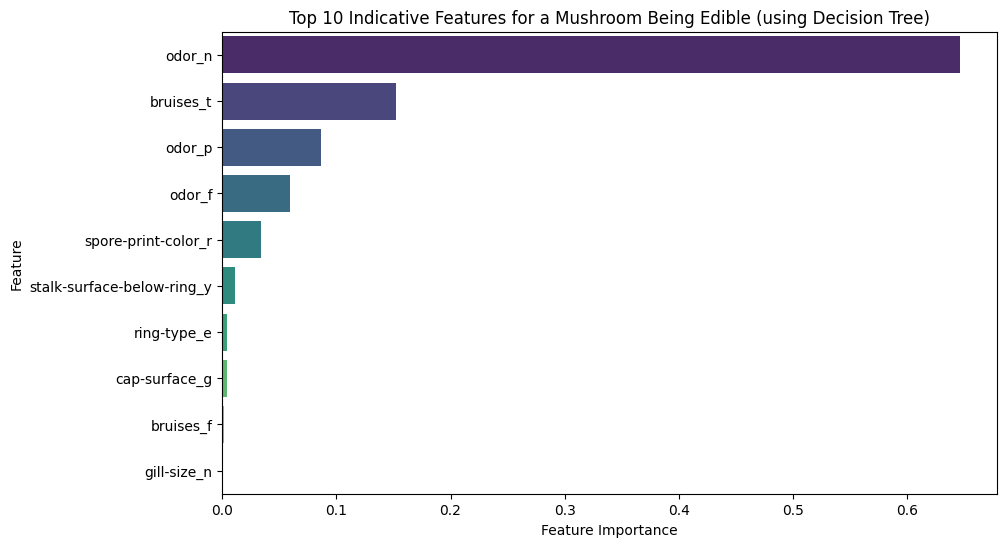

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get feature importances
importance_df = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})

# Sort the DataFrame by importance in descending order
importance_df_sorted = importance_df.sort_values(by='importance', ascending=False)

# Print the most indicative features
print("Top indicative features for a mushroom being edible (using Decision Tree):")
print(importance_df_sorted.head(10))

# Get the top 10 features
top_features = importance_df_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')

# Set plot title and labels
plt.title('Top 10 Indicative Features for a Mushroom Being Edible (using Decision Tree)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()


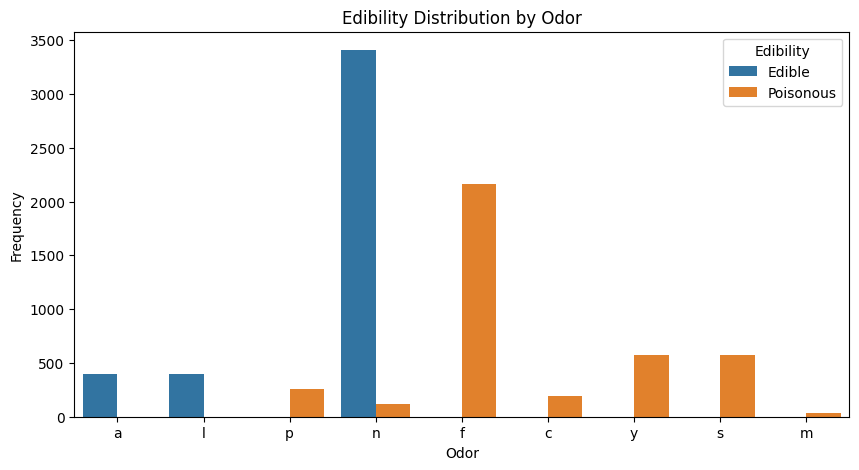

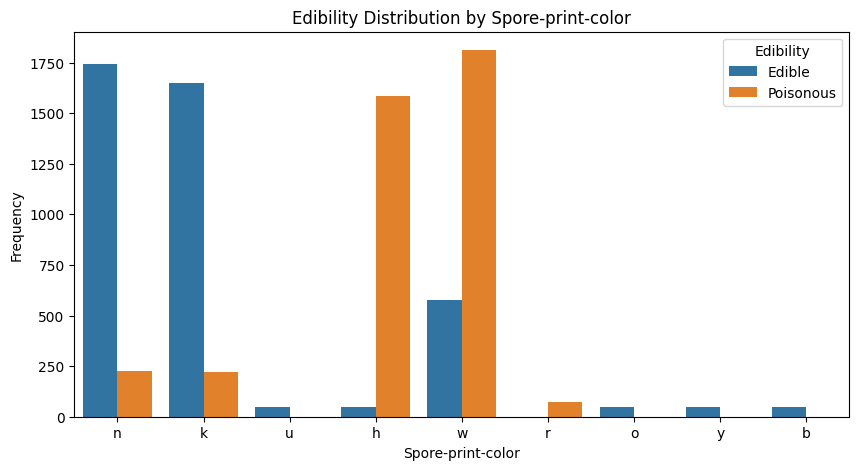

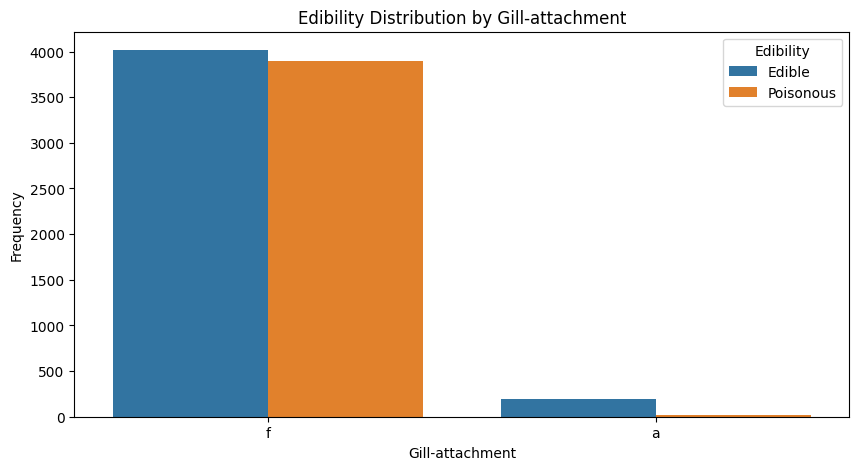

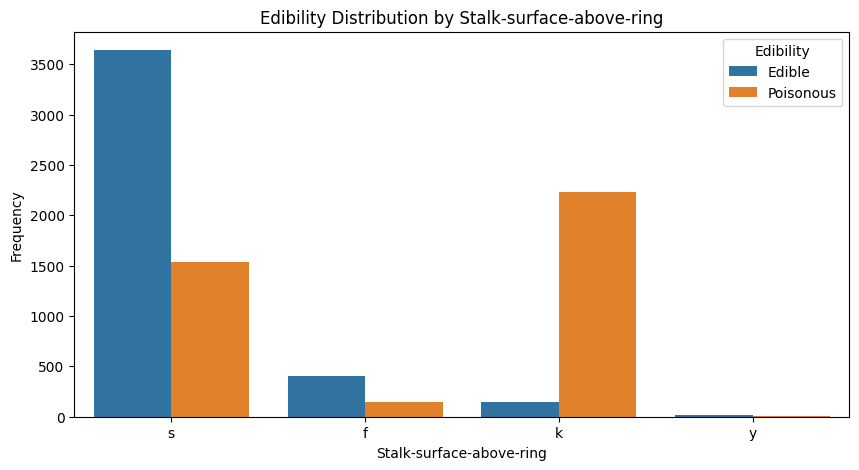

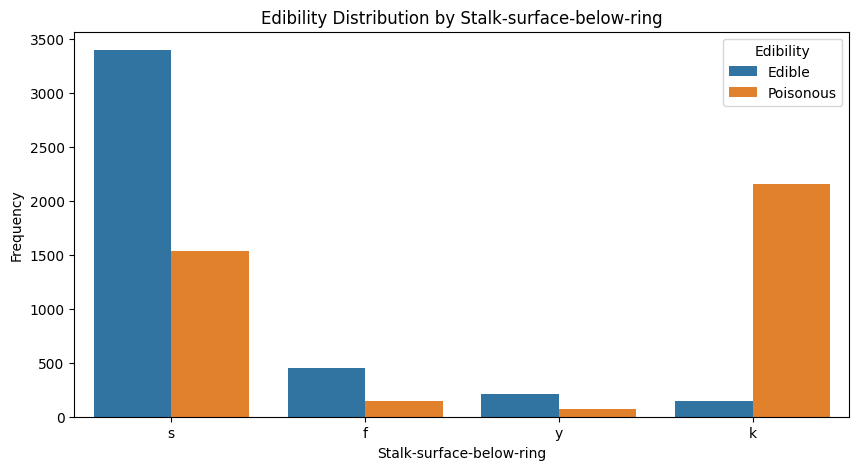

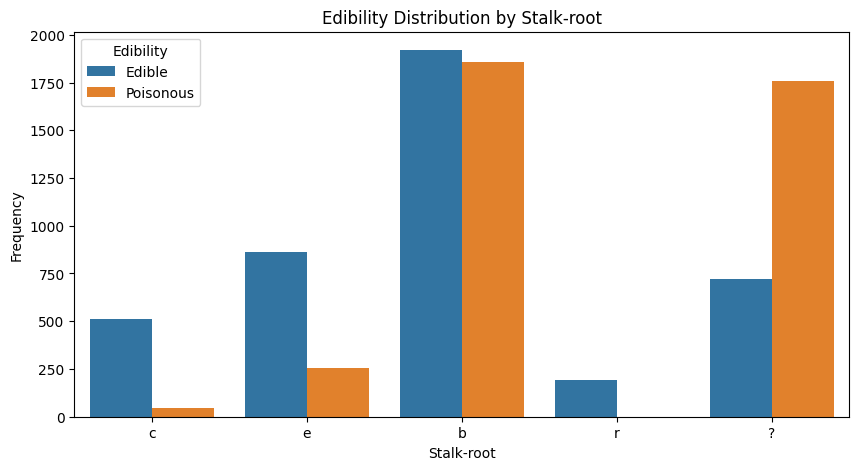

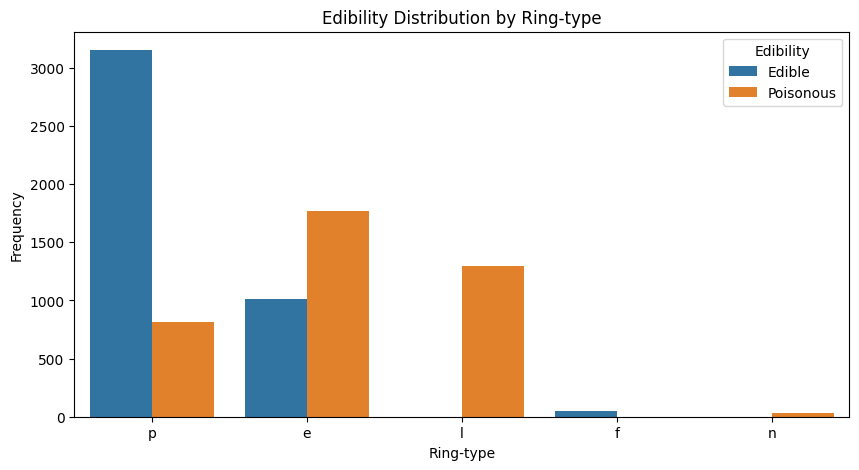

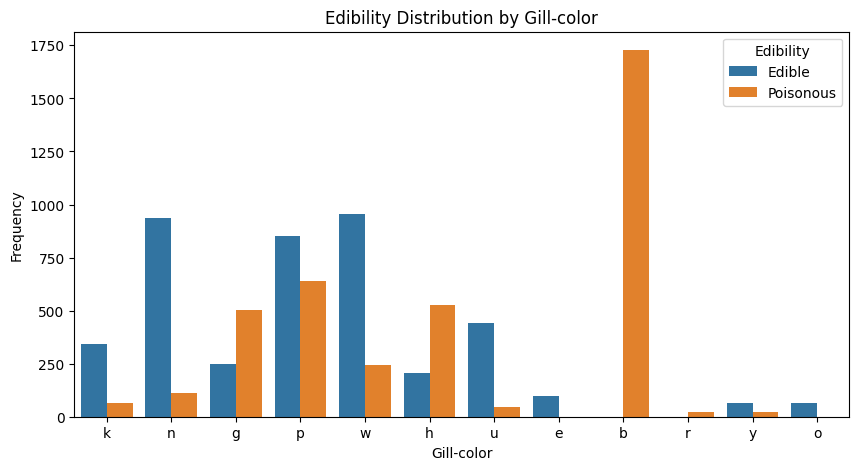

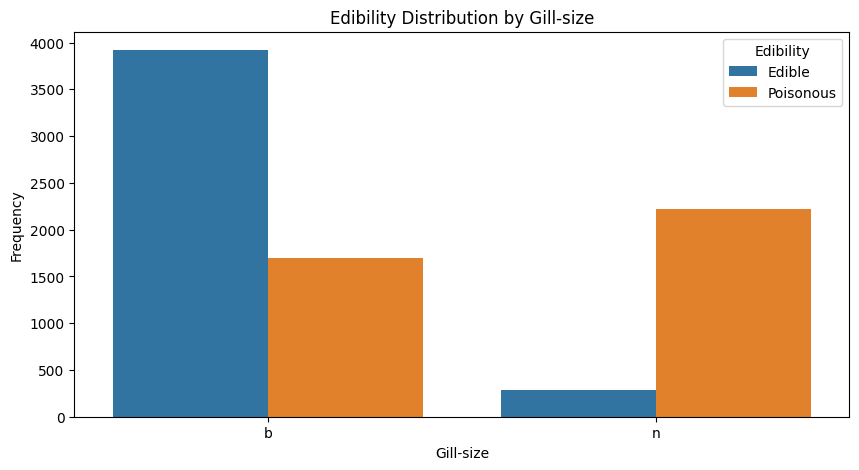

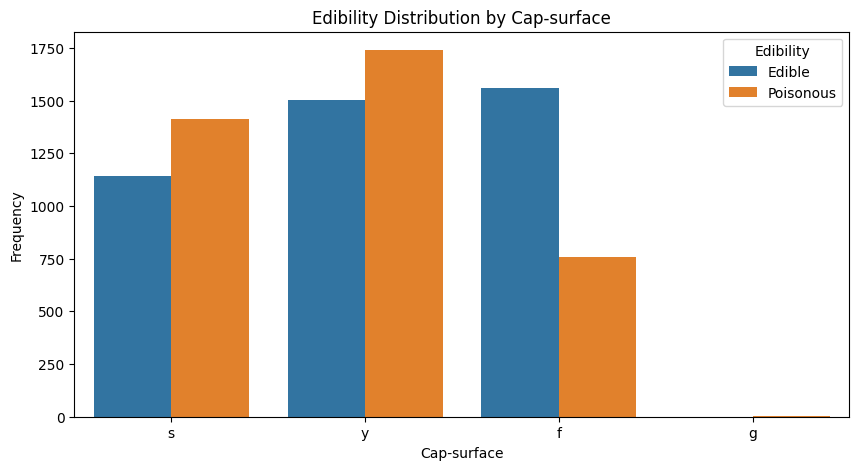

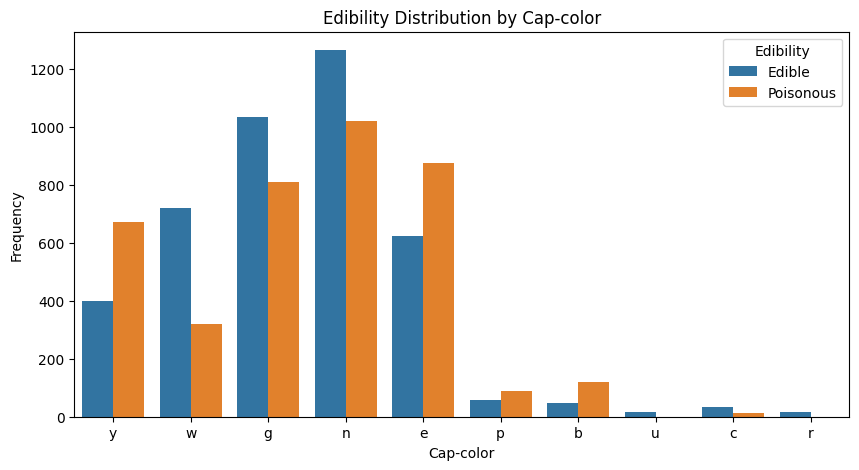

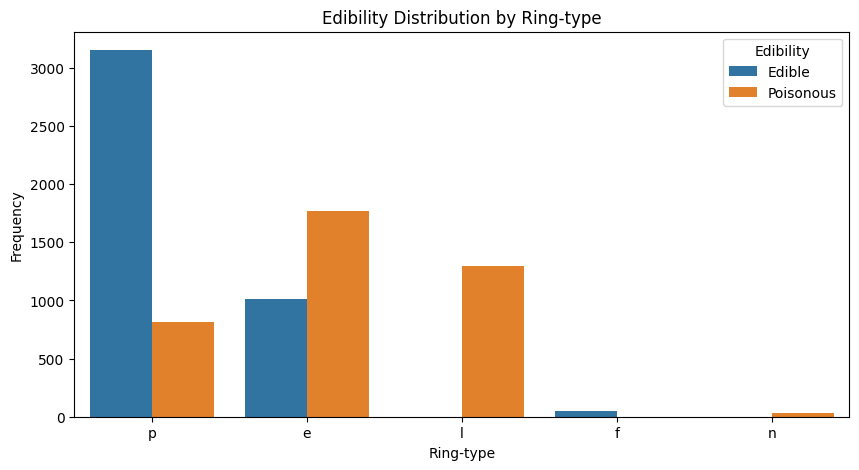

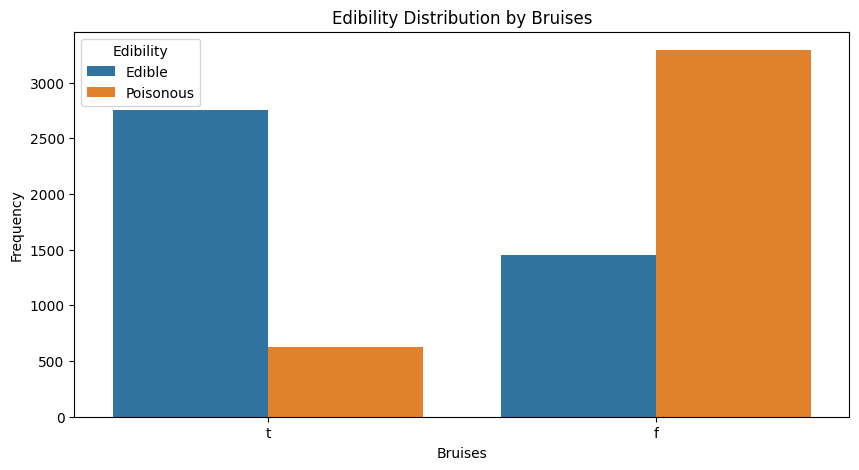

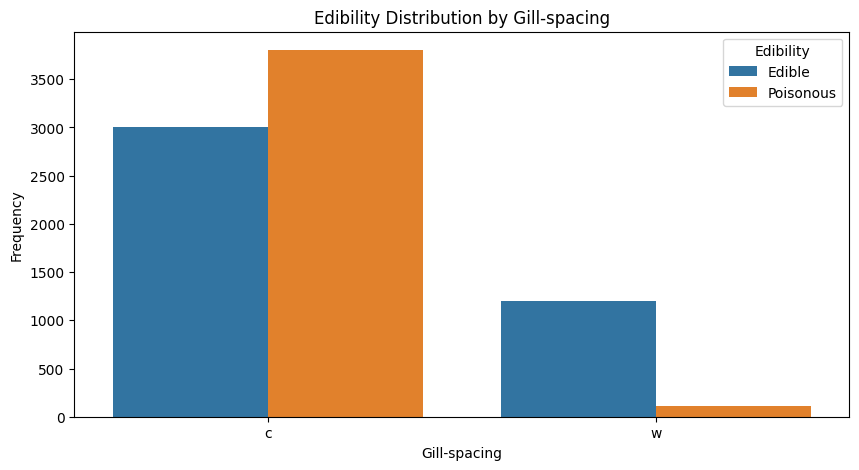

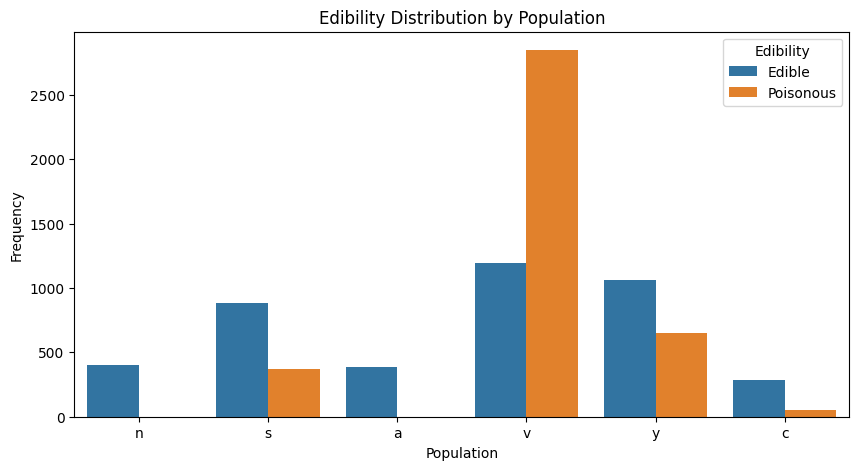

In [ ]:
#manually exploring features we have previosuly seen indicte edibility
features_to_explore2 = ['odor','spore-print-color','gill-attachment','stalk-surface-above-ring','stalk-surface-below-ring','stalk-root','ring-type','gill-color','gill-size','cap-surface','cap-color','ring-type','bruises','gill-spacing','population']

#Make and show graph
for feature in features_to_explore2:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='edibility', data=df)
    plt.title(f'Edibility Distribution by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.legend(title='Edibility', labels=['Edible','Poisonous'])
    plt.show()

### Evaluating the different features of the UCI dataset

Feature importance is important to make new predictions. They're used by models to more easily identify the edibility. The properties in the data may be hard to compute and use for humans, but a machine can understand and use the non-linear relationship between features to make a prediction. Looking at the results from our logistic regression model, we find that the most important feature is odor,  followed by spore print color and gill size. after exploring the classes the indicative features are present in, we find that the features that generally or mostly indicate edibility are:he 

Features indicating edibility: 
Most No smell mushrooms, and all mushrooms having almond or anise odor

Most edible mushrooms have black or brown spore print color

Most Bruised mushrooms 

Most broad gill sized mushrooms

All mushrooms with attached gills

Most of them with smooth stalk shape above ring and all with scaly shape, and most White stalk colored mushrooms, and all gray, red and orange stalk colores above ring 

Ring type: Most Pendant ring typed mushrooms and all flaring typed

Features indicating toxicity:

All mushrooms with pungent, fishy, creosote, foul, spicy and musty door
Most non-bruised mushrooms

Yellow cap colored mushrooms

All mushroms with Foul, pungent, creosote, fishy, spicy and musty odor

Most White and chocolate and all with green spore print colored mushrooms 

All mushrooms with buff gill color

Narrow gill sized mushrooms 

All Buff gill colored mushrooms 

Stalk root: Mushrooms with missing data of stalk roots 

Most toxic mushrooms have silky surface above/below ring

All mushrooms with large and no ring type 

Population: Most of the toxic ones are those Mushrooms with several population

Insignificant features:

stalk shape, stalk-surface-below-ring, stalk-color-below-ring, veil-type, veil-color, and ring-number.

Conclusion:                                                                                                                                                                                                                                                                                                           The most important feature indicating edibility is as we see in the figures and logistic regression results, the odor. By looking at just odor, we can with very high certainty classify a mushroom. To get even more accurate results without using an algorithm, and observations from the plots, we can have a list of features that correlate with the mushrooms that are still poisonous even though they have no smell. Machine learning models work different from us, they can identify that a feature has a high occurence of 

## Task 1.3 - Binary Classification: Reflection and Concluding Remarks

In conclusion, the study performed on the edibility of mushrooms provided us with valuable insight into the classification of muhsrooms and the use of machine learning models. By employing the three algorithms: decision trees, logistic regression and k-nearest neighbour , we built models that successfully classify the edibility of mushrooms. Deicison trees proved to be the most effecitve. It handled non-linear relationships and complex feature interactions, leading to a marginally better performance in terms of accuracy, precision, recall and F1 scores. Moreover, they provide better interpretability and are more robust to outliers. However, it is essential to consider each algorithm's pros and cons in the context of the specific problem at hand, as the performance of any given method may vary depending on factors such as data quality, dimensionality, and underlying relationships between features and target variables.

Our in-depth exploratory data analysis revealed that the odor is the most important feature for determining the edbility of a mushroom. Other important features were spore print color, gill size and bruising. We also learned that some features held no importance or 'weight' in classiyinh mushrooms, leading us to drop some features.

We believe the models are close to classifying a mushroom with 100% accuracy, but it is important to note that not every case is the same, and no model can predict genetic mutation, new and unseen outliers or unexpected changes in nature. Its therefore important to consider using alternative methods for classifying mushrooms, like employing expert knowledge and testing from mycologoists and biologists. An ensemble of methods would certainly minimize the risk of a misclassification. We do not trust the model to correctly classify a mushroom to eat with 100% accuracy.

# Task 2 – Norwegian Sentiment Analysis: Navigating Challenges with SpaCy and LSTM Networks

Sentiment analysis is a widely used application of Natural language processing (NLP). The goal of sentiment analysis is to to correctly determine the sentiment of sentences. To perform the analysis we train a model to identify the emotional tone in a piece of text.

We use a combination of Bidirectional LSTM, tensorflow/keras and the norwegian SpaCy module. LSTM networks are a type of recurrent neural network that have been show to be particularly effective in sentiment analysis tasks. SpaCy is an industry-grade machine learning library for natural language processing. The module nb_core_news_lg contains multiple modules that are beneficial for our project. Tensorflow is an open source machine learning library, keras is a high-level neural network running on the tensorflow platform.

## Code

In [ ]:
#Install spacy (Required)
!pip install spacy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
#Installing the correct spacy module (Required)
!python -m spacy download nb_core_news_lg

2023-05-01 08:23:52.952854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.4/569.4 MB 1.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('nb_core_news_lg')


In [ ]:
# Loading the required libraries/packages
import pandas as pd
import numpy as np
import re
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Embedding
from tensorflow.keras.regularizers import l2
from imblearn.under_sampling import RandomUnderSampler 
import string
from sklearn.utils import class_weight

### Exploratory data analysis

In [ ]:
# Load the datasets as pandas dataframes - easy to work wi
train_df = pd.read_json('/work/3file/train.json')
dev_df = pd.read_json('/work/3file/dev.json')
test_df = pd.read_json('/work/3file/test.json')

In [ ]:
train_df.head(2)

,sent_id,text,label
0,201911-01-01,Philips 190G6,Neutral
1,201911-02-01,Med integrerte høyttalere som på ingen måte er...,Neutral


In [ ]:
dev_df.head(2)

,sent_id,text,label
0,108886-01-01,« Firework »,Neutral
1,108886-02-01,"Hun avslutter , lurt nok , med sin aller størs...",Positive


In [ ]:
test_df.head(2)

,sent_id,text,label
0,201344-01-01,Garmin satser på urmakerkvalitet,Neutral
1,201344-02-01,Garmin Fenix Chronos er meget god tur- og tren...,Positive


In [ ]:
train_df.shape


(7973, 3)

In [ ]:
dev_df.shape


(1411, 3)

In [ ]:
test_df.shape

(1181, 3)

Datasets vary in size, will look at label distribution.

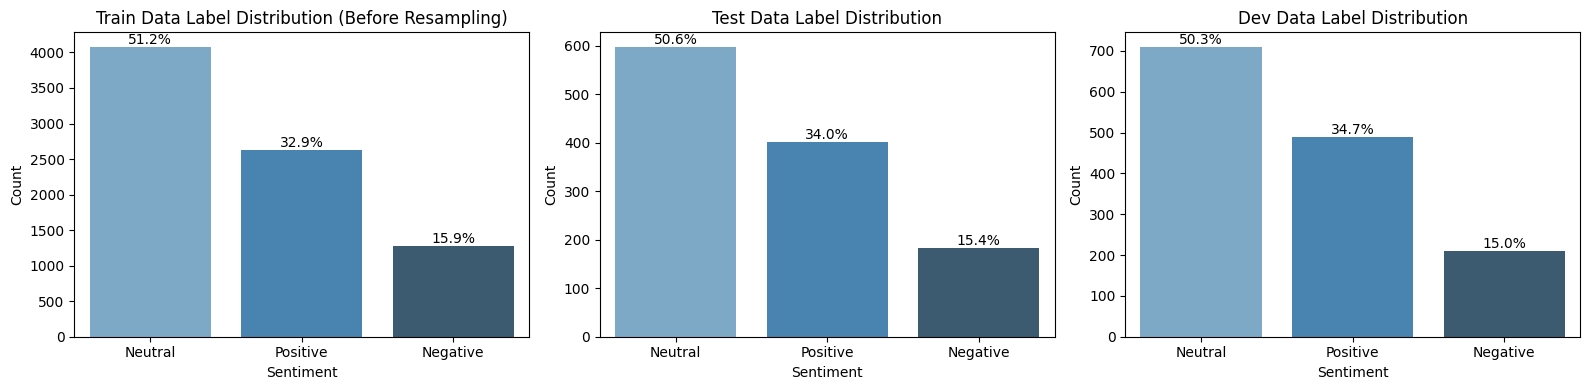

In [ ]:
# Look at label distribution among datasets

# Define function to plot bar graph of label distribution
def plot_label_distribution(df, ax, title):
    label_counts = df['label'].value_counts()
    sns.barplot(x=label_counts.index, y=label_counts.values, palette='Blues_d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

    # Calculate percentage of each label
    total = label_counts.sum()
    for i, count in enumerate(label_counts):
        percentage = count / total * 100
        ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

def plot_label_distribution_resampled(labels, ax, title):
    unique, counts = np.unique(labels, return_counts=True)
    label_counts = dict(zip(unique, counts))
    sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='Blues_d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

    # Calculate percentage of each label
    total = sum(label_counts.values())
    for i, count in enumerate(label_counts.values()):
        percentage = count / total * 100
        ax.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

# Create figure with subplots
fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

# Plot label distribution for train_df
plot_label_distribution(train_df, axs[0], 'Train Data Label Distribution (Before Resampling)')

# Plot label distribution for test_df
plot_label_distribution(test_df, axs[1], 'Test Data Label Distribution')

# Plot label distribution for dev_df
plot_label_distribution(dev_df, axs[2], 'Dev Data Label Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


![Picture title](image-20230502-105239.png)

### Preprocessing and model

In [ ]:
#Drop unecessary columns
train_df = train_df.drop(columns=["sent_id"])
dev_df = dev_df.drop(columns=["sent_id"])
test_df = test_df.drop(columns=["sent_id"])

#map labels for algorithm
train_df['sentiment'] = train_df['label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1})
dev_df['sentiment'] = dev_df['label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1})
test_df['sentiment'] = test_df['label'].map({'Positive': 2, 'Negative': 0, 'Neutral': 1})

Dropping 'sent_id' and mapping labels.

In [ ]:
#Load the norwegian spacy module to use in preprocessing and word embedding
nlp = spacy.load('nb_core_news_lg')

#Extracting and setting stopwords
stopwords = spacy.lang.nb.stop_words.STOP_WORDS
print(stopwords)

{'svært', 'gikk', 'kl', 'se', 'mål', 'over', 'seks', 'flere', 'å', 'annet', 'satt', 'neste', 'løpet', 'tok', 'la', 'under', 'fikk', 'på', 'være', 'folk', 'veldig', 'videre', 'ett', 'før', 'først', 'viktig', 'vant', 'sted', 'kunne', 'gjort', 'ha', 'siste', 'men', 'fram', 'mange', 'disse', 'grunn', 'så', 'gang', 'her', 'uten', 'ikke', 'kroner', 'rundt', 'kommer', 'sitt', 'var', 'blant', 'store', 'dem', 'by', 'i', 'en', 'når', 'hans', 'bedre', 'bare', 'gi', 'god', 'annen', 'står', 'enn', 'kontakt', 'stedet', 'tror', 'siden', 'fire', 'ifølge', 'sammen', 'personer', 'mye', 'tidligere', 'alt', 'ville', 'vår', 'kampen', 'får', 'du', 'til', 'ble', 'stor', 'alle', 'landet', 'må', 'fortsatt', 'tatt', 'gjøre', 'kort', 'gjør', 'henne', 'komme', 'ham', 'da', 'de', 'det', 'med', 'opp', 'selv', 'mennesker', 'igjen', 'land', 'ut', 'vi', 'nå', 'ligger', 'gå', 'utenfor', 'første', 'ta', 'samme', 'man', 'sine', 'beste', 'like', 'få', 'dette', 'fått', 'leder', 'meg', 'laget', 'godt', 'er', 'har', 'oss', '

In [ ]:
# Concatenate the text from all dataframes into a single series
combined_text = pd.concat([train_df['text'], test_df['text'], dev_df['text']])

# Split the text into words and get the unique words
unique_words = set(combined_text.str.split().sum())

# Print the number of unique words
print(len(unique_words))


28181


In [ ]:
#preprocess each entry for simplifying data
def preprocess_text(text, common_words=['ikke','godt','god']):
    # Remove punctuations
    text = re.sub(f"[{string.punctuation}]", " ", text)

    text = text.lower()
    # Remove special characters
    text = re.sub(r"[^a-zåäöæøA-ZÅÄÖÆØ0-9]+", " ", text)

    # Tokenize and lemmatize the text, remove stopwords and single-letter words
    doc = nlp(text)
    
    # Replace "godt" with "god", keeping god because its a good indicator of sentiment.
    tokens = [token.lemma_ if token.lemma_ != "godt" else "god" for token in doc if len(token.text) > 1 and not token.is_stop or token.lemma_ in common_words]

    # Join tokens back to a single string
    return " ".join(tokens)

#Applying preprocessing, creating a new columns to compare results and check method.
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)
dev_df['preprocessed_text'] = dev_df['text'].apply(preprocess_text)
test_df['preprocessed_text'] = test_df['text'].apply(preprocess_text)


In [ ]:
#Checking to see if our preprocessing cleared text from any columns, if true, remove the column.
def find_whitespace_changes(df):
    def check_preprocessed_whitespace(row):
        preprocessed = row['preprocessed_text']
        return row['text'].strip() != "" and preprocessed.strip() == ""

    whitespace_indices = df[df.apply(check_preprocessed_whitespace, axis=1)].index
    return whitespace_indices

#Finding indices with only whitespace for each dataframe
train_whitespace_indices = find_whitespace_changes(train_df)
test_whitespace_indices = find_whitespace_changes(test_df)
dev_whitespace_indices = find_whitespace_changes(dev_df)

#Checking whitespace columns (exploring columns to see if preprocessing is correct)
print("Train DataFrame whitespace indices:\n", train_whitespace_indices)
print("Test DataFrame whitespace indices:\n", test_whitespace_indices)
print("Dev DataFrame whitespace indices:\n", dev_whitespace_indices)

#Dropping rows with only whitespace
train_df = train_df.drop(train_whitespace_indices, axis=0)
test_df = test_df.drop(test_whitespace_indices, axis=0)
dev_df = dev_df.drop(dev_whitespace_indices, axis=0)

Train DataFrame whitespace indices:
 Int64Index([  77,   80,  120,  186,  276,  411,  609,  724,  888,  936,  971,
             992,  995, 1008, 1195, 1208, 1558, 1671, 1755, 1990, 2068, 2156,
            2217, 2441, 2543, 2582, 2584, 2587, 2703, 2721, 2782, 2936, 3319,
            3540, 3546, 3600, 3640, 3643, 3696, 3735, 3897, 3918, 4083, 4175,
            4258, 4575, 4611, 4615, 4899, 5027, 5080, 5247, 5284, 5292, 5295,
            5301, 5304, 5308, 5319, 5322, 5330, 5506, 5592, 5901, 6031, 6319,
            6338, 6436, 6519, 6627, 6825, 6907, 6984, 7003, 7250, 7254, 7276,
            7298, 7299, 7384, 7453, 7494, 7502, 7553, 7596, 7616, 7692, 7766,
            7810, 7812, 7969],
           dtype='int64')
Test DataFrame whitespace indices:
 Int64Index([66, 479, 544, 655, 674, 814, 847, 848, 1018, 1023], dtype='int64')
Dev DataFrame whitespace indices:
 Int64Index([566, 832, 936, 1204, 1216, 1301, 1341], dtype='int64')


In [ ]:
# Concatenate the text from all dataframes into a single series
combined_text2 = pd.concat([train_df['preprocessed_text'], test_df['preprocessed_text'], dev_df['preprocessed_text']])

# Split the text into words and get the unique words
unique_words2 = set(combined_text2.str.split().sum())

# Print the number of unique words
print(len(unique_words2))


20209


In [ ]:
#average length of sentences - used in padding (applying more than average as many are above)
avg_len = train_df['preprocessed_text'].apply(len).mean()

print(avg_len)

51.352575488454704


In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Convert to integer sequence
num_words = 20209 + 1
max_len = 150

word_to_freq = [k for k, _ in Counter(' '.join(pd.concat([train_df.preprocessed_text, test_df.preprocessed_text, dev_df.preprocessed_text])).split()).most_common(num_words-1)]
word_to_freq = {'<UNK>': 0, **{word: (i+1) for i, word in enumerate(word_to_freq)}}


train_contents = np.array([[word_to_freq.get(word, 0) for word in r.split()] for r in train_df.preprocessed_text], dtype=object)
dev_contents = np.array([[word_to_freq.get(word, 0) for word in r.split()] for r in dev_df.preprocessed_text], dtype=object)
test_contents = np.array([[word_to_freq.get(word, 0) for word in r.split()] for r in test_df.preprocessed_text], dtype=object)

# Pad sequences
trainX = tf.keras.preprocessing.sequence.pad_sequences(train_contents, maxlen=max_len)
devX = tf.keras.preprocessing.sequence.pad_sequences(dev_contents, maxlen=max_len)
testX = tf.keras.preprocessing.sequence.pad_sequences(test_contents, maxlen=max_len)

#oversampling to equalize classes in train set
ros = RandomOverSampler(sampling_strategy='auto')
trainX_resampled, trainY_resampled = ros.fit_resample(trainX, train_df.sentiment)

#Setting parameters of embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((num_words, embedding_dim))

# Embedding for each word, looping over word_to_freq to find the word linked to the integer given earlier
for word, i in word_to_freq.items():
    embedding_vector = nlp.vocab[word].vector
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Create an embedding vector for the <UNK> token
embedding_matrix[0] = np.mean(embedding_matrix[1:], axis=0)


Defining embedding matrix, oversampling train set, encoding the processed text

In [ ]:
# Create train and test labels
trainY = train_df.sentiment
devY = dev_df.sentiment
testY = test_df.sentiment

Create the labels for train and testing

In [ ]:
#Function to plot accuracy and loss, used to visualize and more easily interpret results.
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

In [ ]:
# Define model architecture
model = tf.keras.Sequential()
# Embedding layer initializes embeddings with our matrix, applying them to our entries, set as trainable
model.add(Embedding(num_words, embedding_dim, input_shape=(trainX.shape[1],),weights=[embedding_matrix], trainable=True))
#Randomly dropping some entries
model.add(SpatialDropout1D(0.3))
#bidirecitonal LSTM with dropout layers and regularisation
model.add(Bidirectional(LSTM(units=64, activation='tanh', dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=l2(0.001))))
#Dropout to drop features
model.add(Dropout(0.5))
#Classifying sentiment
model.add(Dense(units=3, activation='softmax', kernel_regularizer=l2(0.1)))
#summarizing model to see architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 300)          6063000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 150, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 6,250,267
Trainable params: 6,250,267
No

We define our model architecture. We tried many diffferent hyperparameters, but no major imporvements could be found with different hyperparamters.

Epoch 1/30
375/375 [==============================] - 538s 1s/step - loss: 2.1309 - accuracy: 0.3561 - val_loss: 1.9241 - val_accuracy: 0.4665
Epoch 2/30
375/375 [==============================] - 526s 1s/step - loss: 1.8588 - accuracy: 0.3919 - val_loss: 1.6870 - val_accuracy: 0.5449
Epoch 3/30
375/375 [==============================] - 523s 1s/step - loss: 1.6696 - accuracy: 0.4230 - val_loss: 1.5377 - val_accuracy: 0.5449
Epoch 4/30
375/375 [==============================] - 470s 1s/step - loss: 1.5277 - accuracy: 0.4559 - val_loss: 1.4145 - val_accuracy: 0.5655
Epoch 5/30
375/375 [==============================] - 525s 1s/step - loss: 1.4310 - accuracy: 0.4753 - val_loss: 1.3331 - val_accuracy: 0.5791
Epoch 6/30
375/375 [==============================] - 579s 2s/step - loss: 1.3531 - accuracy: 0.4978 - val_loss: 1.2754 - val_accuracy: 0.5698
Epoch 7/30
375/375 [==============================] - 545s 1s/step - loss: 1.3016 - accuracy: 0.5109 - val_loss: 1.2216 - val_accuracy: 0.5855

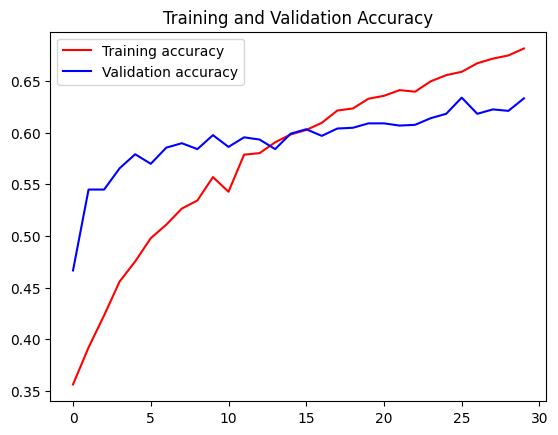

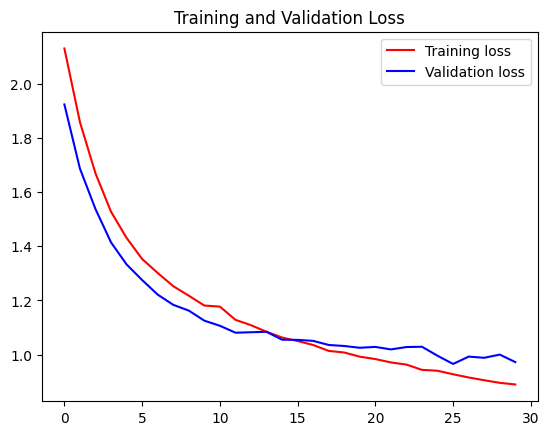

375/375 [==============================] - 53s 142ms/step
0.9856678247451782 0.6345004439353943
Loss: 0.99
Accuracy 0.63
Precision: 0.66
Recall: 0.63
F1-score: 0.64


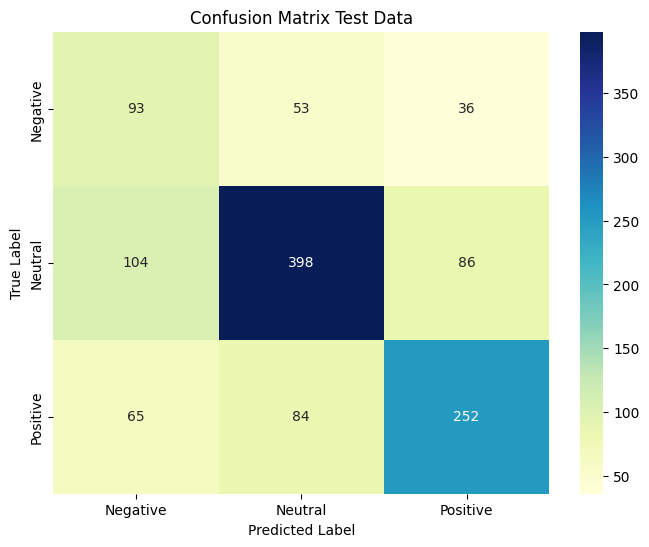

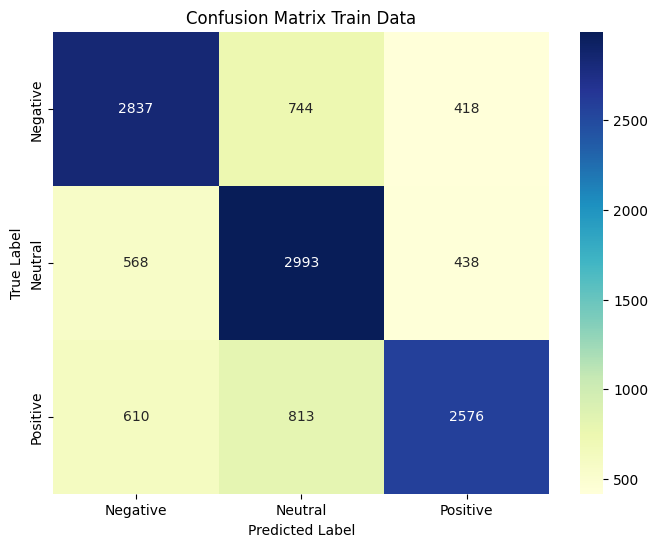

Classification Report on test dataset:
               precision    recall  f1-score   support

    Negative       0.35      0.51      0.42       182
     Neutral       0.74      0.68      0.71       588
    Positive       0.67      0.63      0.65       401

    accuracy                           0.63      1171
   macro avg       0.59      0.61      0.59      1171
weighted avg       0.66      0.63      0.64      1171

Classification Report on train dataset:
               precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      3999
     Neutral       0.66      0.75      0.70      3999
    Positive       0.75      0.64      0.69      3999

    accuracy                           0.70     11997
   macro avg       0.70      0.70      0.70     11997
weighted avg       0.70      0.70      0.70     11997

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 em

In [ ]:
#Training and evaluating the model

#Set the resampled dataset as training parameters
trainY = trainY_resampled
trainX = trainX_resampled
#balance classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(trainY), y=trainY)
class_weight_dict = dict(enumerate(class_weights))

# Compile model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Fit the model and get the history object
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(devX, devY), callbacks=[early_stopping])

# Plot accuracy and loss
plot_accuracy_and_loss(history)

# Get predictions
y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)

#Get preidctions for train
y_pred_train = model.predict(trainX)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Evaluate model
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(loss, accuracy)
print("Loss: {:.2f}".format(loss))
print("Accuracy {:.2f}".format(accuracy))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred_classes, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

# Create confusion matrix for train and test
cm = confusion_matrix(testY, y_pred_classes)

cm2 = confusion_matrix(trainY, y_pred_classes_train)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#plot confusion matrix for train
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix Train Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Create classification report
report = classification_report(testY, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report on test dataset:\n", report)

# Create classification report for train
report = classification_report(trainY, y_pred_classes_train, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report on train dataset:\n", report)
model.summary()

#un-comment and insert name to save model for loading later
model.save("Spatial_0.3_Adam_0.0001_trainable_true.h5")


### Additional code to analyze text, common words, word coverage in embedding matrix and word importance

In [ ]:
import spacy
import pandas as pd
from collections import Counter
import re

# Load the Norwegian Spacy model
nlp = spacy.load('nb_core_news_lg')

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

def analyze_dataset(df, preprocessed_text):
    word_counter = Counter()
    spacy_word_counter = Counter()

    for text in df[preprocessed_text]:
        tokens = tokenize(text)
        word_counter.update(tokens)
        
        # Check if words are in Spacy's vocabulary and have a vector
        for token in tokens:
            if token in nlp.vocab and nlp.vocab[token].has_vector:
                spacy_word_counter.update([token])
                
    total_words = sum(word_counter.values())
    unique_words = len(word_counter)
    
    spacy_total_words = sum(spacy_word_counter.values())
    spacy_unique_words = len(spacy_word_counter)
    
    print(f"Total words: {total_words}")
    print(f"Unique words: {unique_words}")
    print(f"Top 10 most common words: {word_counter.most_common(10)}")
    print()
    print(f"Total words in Spacy embeddings: {spacy_total_words}")
    print(f"Unique words in Spacy embeddings: {spacy_unique_words}")
    print(f"Coverage: {spacy_total_words / total_words * 100:.2f}%")
    print()

# Assuming the text data is in a column named 'preprocessed_text'
print("Train dataset analysis:")
analyze_dataset(train_df, 'preprocessed_text')

print("Test dataset analysis:")
analyze_dataset(test_df, 'preprocessed_text')

print("Validation dataset analysis:")
analyze_dataset(dev_df, 'preprocessed_text')


Train dataset analysis:
Total words: 57431
Unique words: 16430
Top 10 most common words: [('ikke', 903), ('god', 543), ('film', 360), ('the', 254), ('liten', 232), ('to', 195), ('spill', 151), ('gi', 135), ('historie', 133), ('spille', 133)]

Total words in Spacy embeddings: 438
Unique words in Spacy embeddings: 40
Coverage: 0.76%

Test dataset analysis:
Total words: 8648
Unique words: 4188
Top 10 most common words: [('ikke', 158), ('god', 70), ('film', 41), ('liten', 34), ('gi', 29), ('to', 28), ('sesong', 27), ('mye', 26), ('historie', 26), ('sterk', 24)]

Total words in Spacy embeddings: 66
Unique words in Spacy embeddings: 19
Coverage: 0.76%

Validation dataset analysis:
Total words: 10294
Unique words: 4664
Top 10 most common words: [('ikke', 160), ('god', 95), ('film', 69), ('gi', 47), ('spill', 47), ('liten', 39), ('to', 37), ('the', 37), ('spille', 34), ('konsoll', 32)]

Total words in Spacy embeddings: 91
Unique words in Spacy embeddings: 10
Coverage: 0.88%



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tokenize)
X_train = vectorizer.fit_transform(train_df['preprocessed_text'])
y_train = train_df['sentiment']


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
import numpy as np

# Get feature importance
coef = logreg.coef_
vocab = vectorizer.get_feature_names()


/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import spacy

nlp = spacy.load('nb_core_news_lg')

def display_top_correlated_words(coef, vocab, sentiment_labels, n=10):
    for idx, sentiment in enumerate(sentiment_labels):
        sorted_coef_index = coef[idx].argsort()
        top_words = np.array(vocab)[sorted_coef_index][-n:]
        bottom_words = np.array(vocab)[sorted_coef_index][:n]

        print(f"Sentiment: {sentiment}")
        print(f"Top {n} positive correlated words: {', '.join(top_words)}")
        print(f"Top {n} negative correlated words: {', '.join(bottom_words)}")
        
        top_words_embeddings = [word for word in top_words if nlp.vocab[word].has_vector]
        bottom_words_embeddings = [word for word in bottom_words if nlp.vocab[word].has_vector]

        print(f"Top positive correlated words in embedding matrix: {', '.join(top_words_embeddings)}")
        print(f"Top negative correlated words in embedding matrix: {', '.join(bottom_words_embeddings)}")
        print()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
display_top_correlated_words(coef, vocab, sentiment_labels, n=10)


Sentiment: Negative
Top 10 positive correlated words: føles, irritere, dårlig, kjedelig, imidlertid, burde, dessverre, mangle, ikke, lite
Top 10 negative correlated words: hvordan, sterk, liv, du, la, kjent, spille, fantastisk, velge, lage
Top positive correlated words in embedding matrix: føles, irritere, dårlig, kjedelig, imidlertid, burde, dessverre, mangle, ikke, lite
Top negative correlated words in embedding matrix: hvordan, sterk, liv, du, la, kjent, spille, fantastisk, velge, lage

Sentiment: Neutral
Top 10 positive correlated words: søster, tanke, spor, anmeldelse, låt, lese, regi, konklusjon, liv, handle
Top 10 negative correlated words: bra, god, imponere, ganske, føles, morsom, lite, imidlertid, dårlig, fin
Top positive correlated words in embedding matrix: søster, tanke, spor, anmeldelse, låt, lese, regi, konklusjon, liv, handle
Top negative correlated words in embedding matrix: bra, god, imponere, ganske, føles, morsom, lite, imidlertid, dårlig, fin

Sentiment: Positive
T

In [ ]:
# Save model with desired name
# model.save("name.h5")

### Training and evaluation on saved model

In [ ]:
#Optional code block - to be used when training or getting evaluation of certain models trained.
#load pretrained model to continue training (Set path of desired model)
loaded_model = load_model("model_name.h5")

trainY = trainY_resampled
trainX = trainX_resampled
#balance classes
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(trainY), y=trainY)
class_weight_dict = dict(enumerate(class_weights))

# Compile and fit model with Adam optimizer
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model and get the history object
history = loaded_model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(devX, devY), callbacks=[early_stopping])

# Plot accuracy and loss
plot_accuracy_and_loss(history)

# Get predictions
y_pred = loaded_model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)

#Get preidctions for train
y_pred_train = loaded_model.predict(trainX)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Evaluate model
loss, accuracy = loaded_model.evaluate(testX, testY, verbose=0)
print(loss, accuracy)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred_classes, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

# Create confusion matrix
cm = confusion_matrix(testY, y_pred_classes)

cm2 = confusion_matrix(trainY, y_pred_classes_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#plot confusion matrix for train
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix Train Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Create classification report
report = classification_report(testY, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report on test dataset:\n", report)

# Create classification report for train
report = classification_report(trainY, y_pred_classes_train, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report on train dataset:\n", report)
loaded_model.summary()


### Code to run for evaluating specific model

In [ ]:
#Optional code to run for evaluation

loaded_model = load_model("Spatial_0.3_Adam_0.0001_trainable_true.h5")

# Get predictions
y_pred = loaded_model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)

#Get preidctions for train
y_pred_train = loaded_model.predict(trainX)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Evaluate model
loss, accuracy = loaded_model.evaluate(testX, testY, verbose=0)
print(loss, accuracy)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(testY, y_pred_classes, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

# Create confusion matrix
cm = confusion_matrix(testY, y_pred_classes)

cm2 = confusion_matrix(trainY, y_pred_classes_train)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#plot confusion matrix for train
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix Train Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Create classification report
report = classification_report(testY, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report on test dataset:\n", report)

# Create classification report for train
report = classification_report(trainY, y_pred_classes_train, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report on train dataset:\n", report)
loaded_model.summary()

NameError: name 'testX' is not defined

## Task 2.2 - Creating a machine learning model: Approach and Considerations

Discoveries from Exploratory Data Analysis: Insights into Data and Distributions
Without data exploration and analysis, it’s hard to draw any meaningful conclusions about the data. We loaded the json formatted datasets using pandas, giving us a more interpretable and feature-filled library.The dataset already is split into three pre-defined datasets, train, test, and dev. Each contains a mixture of negative, neutral, and positively labeled sentences. The datasets are imbalanced, with classes respectively constituting neutral 50% or more, positive 32% or more, and negative 15% or more for all datasets. Some entries in the columns are not in a valid fomrat for our model, containing only symbols. Text content is very diverse, containing many subjects and sometimes not complete sentences, lengths range from 1 to over 350 characters. We build our strategy, details outlined below based on our findings.

Preprocessing text and formatting:                                                                                                                                                                                                                                                                            We dropped the unnecessary "sent_id" column. Then we mapped the sentiment labels to integer values for the algorithm to be able to classify. To preprocess our datasets we used features from the SpaCy pipeline and regex features. We lower text to reduce word count and properly format words, we use the built-in tokenizer from SpaCy which removes stopwords and lemmatizes words to reduce the complexity of words and sentences. This allows the algorithm to more easily capture the sentiment and generalize for the test set.

Balancing datasets:                                                                                                                                                                                                                                                                          Oversampling the minority classes on the training set lead to better training, with validation accuracy improving. We oversample the training set to create more instances of the under-represented classes for the model to better generalize and learn on all classes. Without balanced classes the model struggles to draw meaningful conclusions from under-represented classes. 

Additional:                                                                                                                                                                                                                                                                                                                                   We go through the top words and check if they're present in the embedding matrix. This is done to make sure we don't miss any important words. We use a logistic regression model to check if the words that are important for classifying sentiment is present in the embedding matrix. This is what led us to exclude ikke, godt and god from the preprocessing/stopword removal.

Transforming text into Machine-Learning-Compatible Representations                                                                                                                                                               Furthermore, we used a Counter to identify the most common words in the text and select the words occurring more than once to be used as features for the model. We do not use words appearing once to reduce the effect of outliers. We converted each word into an integer sequence and then padded the sequences  to ensure that all sentences have the same length. Here we also applied the oversampler on the training set. Our goal was to increase it's accuracy and form meaningful representations to use in the evaluation. We also define the embedding matrix that uses pretrained embeddings from spacy to carry correlation between words in sentences, giving the model more information to compute it's classification. The embedding matrix is initialized in the embedding layer of the model.

Choosing model parameters:
We chose the bidirectional LSTM architecture for our model because it has shown to perform well in text classification tasks. We used the Adam optimizer, added early stopping and dropout layers to prevent overfitting. We chose the number of LSTM units and the regularization strength based on previous experiments or by hyperparameter tuning using grid search (no longer in code). We used the built-in word embeddings from the Norwegian SpaCy library, setting the variable trainable to True, risking overfitting, but we still achieved the best results with a trainable embedding matrix. We trained our models ranging from 15 to 35 epochs using a batch size of between 32 and 128, once again these parameters were found by manually experimenting with different values. A big challenge for working on the model was the computing time required for a complete run, this lead us to not having the oppertunity to experiment with more architectures and strategies. Our final models parameters are batch size: 128, epoch count: 30.

## Task 2.3 - Discussion and Results

The most valuable way to gain knowledge and draw insights from our model is to evaluate it correctly, using metrics that provide us with actionable information to improve our model. To asess the performance of our model we used a variety of evaluation metrics, including accuracy, loss, precision, recall and F1-score. We also kept a close eye on the validation loss and accuracy during training to detect signs of overfitting and generalizing it's learned knowledge. We used confusion matrices to see the distribution of labels that were misclassified by our model. This is how we gained the knowledge about poor classification for the negative classes. Compared hyperparameters of different models to find the best combination.

### Results on test set:

Precision (Proportion of true labels in the predicted for that class) :  0.66

Accuracy (Proportion of correct predictions among all predicitons): 0.63

Recall (Proportion of true label among all actual in specified label): 0.63

F1 score (Harmonic mean of precision and recall): 0.63

Loss (Measure of model's error or discrepancy between predictions and true values): 0.99

### Training results:

poch 1/30
375/375 [==============================] - 538s 1s/step - loss: 2.1309 - accuracy: 0.3561 - val_loss: 1.9241 - val_accuracy: 0.4665
Epoch 2/30
375/375 [==============================] - 526s 1s/step - loss: 1.8588 - accuracy: 0.3919 - val_loss: 1.6870 - val_accuracy: 0.5449
Epoch 3/30
375/375 [==============================] - 523s 1s/step - loss: 1.6696 - accuracy: 0.4230 - val_loss: 1.5377 - val_accuracy: 0.5449
Epoch 4/30
375/375 [==============================] - 470s 1s/step - loss: 1.5277 - accuracy: 0.4559 - val_loss: 1.4145 - val_accuracy: 0.5655
Epoch 5/30
375/375 [==============================] - 525s 1s/step - loss: 1.4310 - accuracy: 0.4753 - val_loss: 1.3331 - val_accuracy: 0.5791
Epoch 6/30
375/375 [==============================] - 579s 2s/step - loss: 1.3531 - accuracy: 0.4978 - val_loss: 1.2754 - val_accuracy: 0.5698
Epoch 7/30
375/375 [==============================] - 545s 1s/step - loss: 1.3016 - accuracy: 0.5109 - val_loss: 1.2216 - val_accuracy: 0.5855
Epoch 8/30
375/375 [==============================] - 566s 2s/step - loss: 1.2527 - accuracy: 0.5265 - val_loss: 1.1839 - val_accuracy: 0.5897
Epoch 9/30
375/375 [==============================] - 568s 2s/step - loss: 1.2175 - accuracy: 0.5343 - val_loss: 1.1625 - val_accuracy: 0.5840
Epoch 10/30
375/375 [==============================] - 573s 2s/step - loss: 1.1811 - accuracy: 0.5570 - val_loss: 1.1253 - val_accuracy: 0.5976
Epoch 11/30
375/375 [==============================] - 597s 2s/step - loss: 1.1772 - accuracy: 0.5427 - val_loss: 1.1065 - val_accuracy: 0.5862
Epoch 12/30
375/375 [==============================] - 568s 2s/step - loss: 1.1284 - accuracy: 0.5786 - val_loss: 1.0809 - val_accuracy: 0.5954
Epoch 13/30
375/375 [==============================] - 562s 1s/step - loss: 1.1086 - accuracy: 0.5801 - val_loss: 1.0825 - val_accuracy: 0.5933
Epoch 14/30
375/375 [==============================] - 501s 1s/step - loss: 1.0843 - accuracy: 0.5906 - val_loss: 1.0841 - val_accuracy: 0.5840
Epoch 15/30
375/375 [==============================] - 477s 1s/step - loss: 1.0630 - accuracy: 0.5982 - val_loss: 1.0549 - val_accuracy: 0.5990
Epoch 16/30
375/375 [==============================] - 474s 1s/step - loss: 1.0501 - accuracy: 0.6026 - val_loss: 1.0543 - val_accuracy: 0.6033
Epoch 17/30
375/375 [==============================] - 532s 1s/step - loss: 1.0354 - accuracy: 0.6095 - val_loss: 1.0506 - val_accuracy: 0.5969
Epoch 18/30
375/375 [==============================] - 540s 1s/step - loss: 1.0136 - accuracy: 0.6214 - val_loss: 1.0355 - val_accuracy: 0.6040
Epoch 19/30
375/375 [==============================] - 532s 1s/step - loss: 1.0076 - accuracy: 0.6234 - val_loss: 1.0317 - val_accuracy: 0.6047
Epoch 20/30
375/375 [==============================] - 530s 1s/step - loss: 0.9923 - accuracy: 0.6328 - val_loss: 1.0252 - val_accuracy: 0.6090
Epoch 21/30
375/375 [==============================] - 516s 1s/step - loss: 0.9834 - accuracy: 0.6357 - val_loss: 1.0284 - val_accuracy: 0.6090
Epoch 22/30
375/375 [==============================] - 520s 1s/step - loss: 0.9709 - accuracy: 0.6412 - val_loss: 1.0191 - val_accuracy: 0.6068
Epoch 23/30
375/375 [==============================] - 533s 1s/step - loss: 0.9630 - accuracy: 0.6397 - val_loss: 1.0279 - val_accuracy: 0.6075
Epoch 24/30
375/375 [==============================] - 504s 1s/step - loss: 0.9434 - accuracy: 0.6497 - val_loss: 1.0288 - val_accuracy: 0.6140
Epoch 25/30
375/375 [==============================] - 494s 1s/step - loss: 0.9403 - accuracy: 0.6557 - val_loss: 0.9957 - val_accuracy: 0.6182
Epoch 26/30
375/375 [==============================] - 533s 1s/step - loss: 0.9273 - accuracy: 0.6589 - val_loss: 0.9653 - val_accuracy: 0.6339
Epoch 27/30
375/375 [==============================] - 530s 1s/step - loss: 0.9154 - accuracy: 0.6672 - val_loss: 0.9925 - val_accuracy: 0.6182
Epoch 28/30
375/375 [==============================] - 508s 1s/step - loss: 0.9052 - accuracy: 0.6717 - val_loss: 0.9881 - val_accuracy: 0.6225
Epoch 29/30
375/375 [==============================] - 467s 1s/step - loss: 0.8956 - accuracy: 0.6748 - val_loss: 0.9999 - val_accuracy: 0.6211
Epoch 30/30
375/375 [==============================] - 467s 1s/step - loss: 0.8895 - accuracy: 0.6815 - val_loss: 0.9722 - val_accuracy: 0.6332

### Summary:

The results we achieved tell us the model is overfitting on the validation and test set, not generalizing its learned behavior, and not learning after around 8-15 epochs have passed, changing based on our learning rate. Even with dropout and other methods to prevent overfitting we achieved marginally better results. The overfitting comes from class-imbalance and the model not learning the under-represented classes, even with oversampling and regularisation. The model is not fit for real-word use. The model would need to be trained on a much larger dataset and employ additional or more complex methods. We believe the same strategy and techniques we used can work on a different dataset and perform better.

The most important and relevant properties of a sentiment analysis dataset is the text, labels, label distribution and the context in which the text was written. We have identified the dataset to contain sentences derived from a more comprehensive dataset containing reviews and news articles. its also important that we understand variations in the data and try identifying non-literal language, such as sarcasm, irony or idiomatic expressions.

### Advancing Sentiment Analysis: Potential Improvements and Current Limitations

In the future, we plan to improve the sentiment analysis algorithm by addressing several aspects of the model and the dataset. We will investigate the impact of various text pre-processing techniques on the model's performance. We can explore stemming, more components from the SpaCy library, or more advanced techniques like using pre-trained language models, such as BERT or RoBERTa. One of our biggest challenges after class imbalance is the lack of word embeddings for our vocabulary. The model contains words not present in the embeddings. With a larger embedding vocabulary, we are confident results will improve, even with imbalanced datasets. We will also look depper into the linguistics, with deeper understanding of the language, and employing methods dealing with this we can further our knowledge and the capabilities of the model. We also want to gain a deeper understanding of the SpaCy model. We discovered that it contains many different components and featues, but our limited knowledge made it impossible to interpret it without consulting more experienced people. We will also explore techniques like multi-word expressions and other linguistic features the model can't comprehend without explicit programming. We can also make an attempt to incorporate the approach defined in our source called "Github OOV" to create new word embeddings that gets a word embedding from the context in which a word is found.

# Task 3.1 - Convolutional neural network for image classification

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image
import requests
from io import BytesIO
import os
from termcolor import colored

Importing necessary libraries

We start by importing the libraries and modules we need for our code. In this import stage we also load data from a pretrained model. After some reading we found that MobileNet is supposed to work great for machine learning work on low resolution images. 

In [16]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

This next bit of code (unpickle) is a function for making the data from the CIFAR set readable. The function unpickles the 5 data batch files so that we can use them further in our work.

In [17]:
def load_data(batch_files, category_label):
    images = []
    labels = []
    for file in batch_files:
        data_dict = unpickle(file)
        images.extend(data_dict[b'data'])
        labels.extend([(1 if label == category_label else 0) for label in data_dict[b'labels']])
    images = np.array(images).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    labels = np.array(labels)
    return images, labels

After unpickling we need to load our data. We created a load_data function that loads all the data from the batch files, then converts the labels inside the batches to binary. We change the label we want, in this case the label for Airplane, and give it the value 1. All other labels are valued 0. Then the function returns all the images and labels as arrays.

In [18]:
category_label = 0  #"airplane" category has label 0
batch_files = [
    '/work/data_batch_1',
    '/work/data_batch_2',
    '/work/data_batch_3',
    '/work/data_batch_4',
    '/work/data_batch_5',
]

images, labels = load_data(batch_files, category_label)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


Now we need to prepare our dataset. In these lines we specify that “airplane” is the category we want, load the data and split it into two sets. One set for training, and one validation. 

In [19]:
def create_model(input_shape=(32, 32, 3)):
    base_model = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

Now we need to create our model. We wrote a function that creates a new model using the MobileNet pre-trained model and adds a GlobalAveragePooling2D layer and a Dense layer. The function uses sigmoid activation for binary classification. GlobalAveragePooling2d reduces the dimensions of the feature map, without altering the number of channels. The Dense layer is a fully connected layer where the neurons are connected to every neuron in the previous layer, this is something we use for classification.

In [20]:
model_path = '/work/airplane_model.h5'

if os.path.exists(model_path):
    print(f'Loading existing model from FILE:{model_path}...')
    model = load_model(model_path)
else:
    print(f'no existing file found...\ncreating new FILE:{model_path}...')
    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function=preprocess_input
    )
    train_generator = datagen.flow(X_train, y_train, batch_size=128)
    model.fit(train_generator, epochs=20, validation_data=(preprocess_input(X_val), y_val))

    model.save(model_path)

Loading existing model from FILE:/work/airplane_model.h5...


The next step is model loading and training. We wanted to make testing easier on ourselves. So we decided when our model was good enough we wanted to save our training so that we did not have to waste time re-training the model every time we wanted to test. We created a save filename “aiplane_model.h5” and wrote an if statement. The if statement basically says that if the save file already exists, we don't need training and we can go straight to testing. If the file does not exist we create one and start training using the data augmentation with ImageDataGenerator. This data augmentation is a key part of our model. This is a technique used in machine learning to artificially increase both the size and the diversity of our data exposing the model for variations of the same data by transforming it. This is preventing overfitting and is great for the performance of the model. Our model is trained for 20 epochs with a batch size of 128. The model is then named and saved for future testing. 

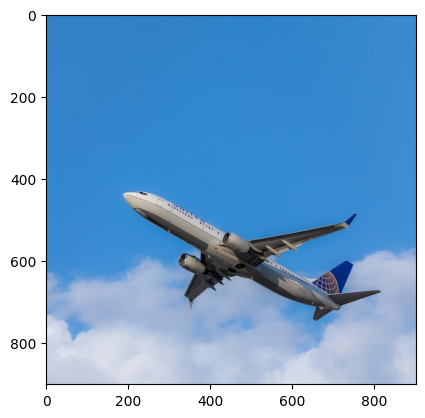

1/1 [==============================] - 0s 35ms/step
Image served to model in this case was /work/plane.jpg
There is a 99.7393131% chance that this image is of an Airplane 


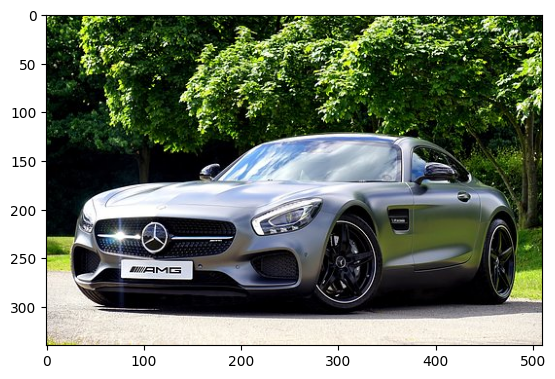

1/1 [==============================] - 0s 31ms/step
Image served to model in this case was /work/bil.jpg
There is a 0.0000146% chance that this image is of an Airplane 


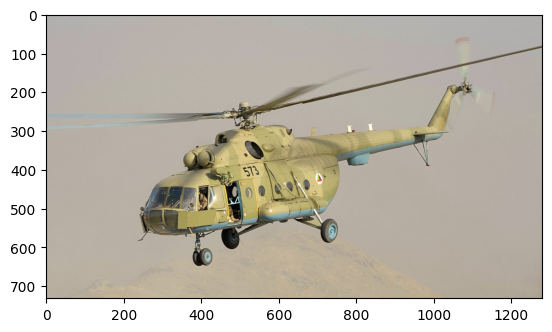

1/1 [==============================] - 0s 79ms/step
Image served to model in this case was /work/heli.jpg
There is a 18.3759123% chance that this image is of an Airplane 


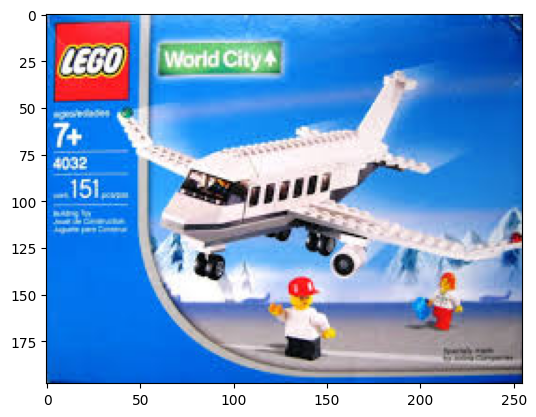

1/1 [==============================] - 0s 87ms/step
Image served to model in this case was /work/lego.jpg
There is a 99.1375327% chance that this image is of an Airplane 


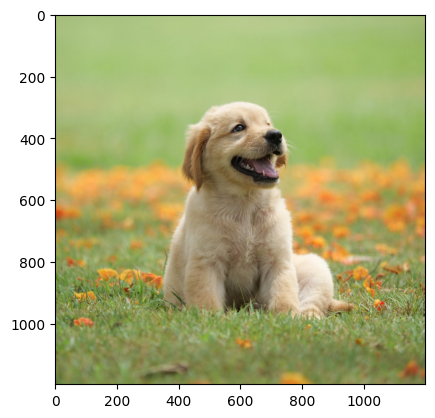

1/1 [==============================] - 0s 34ms/step
Image served to model in this case was /work/dog.jpg
There is a 0.2594105% chance that this image is of an Airplane 


In [22]:
def preprocess_image(image_path, target_size=(32, 32)):
    if os.path.isfile(image_path):  # If the image path is a local file
        img = Image.open(image_path)
    else:  # If the image path is a URL
        response = requests.get(image_path)
        img = Image.open(BytesIO(response.content))

    img = img.convert('RGB')  # Convert the image to RGB format
    img = img.resize(target_size)
    img = np.array(img)
    img = preprocess_input(img)
    return np.expand_dims(img, axis=0)

# Define the image paths
image_paths = [
    '/work/plane.jpg',
    '/work/bil.jpg',
    '/work/heli.jpg',
    '/work/lego.jpg',
    '/work/dog.jpg'
]

# Loop over the image paths and preprocess/classify each image
for image_path in image_paths:
    # Preprocess the image
    new_image = preprocess_image(image_path)

    # Plot the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.show()

    # Predict the class of the image
    prediction = model.predict(new_image)

    # Print the result
    probability = prediction[0][0]
    percentage = probability * 100
    print(f'Image served to model in this case was {image_path}')
    
    if probability > 0.5:
        color = 'green'
        text = f"There is a {percentage:.7f}% chance that this image is of an Airplane "
        print(colored(text,color))
    else:
        color = 'red'
        text = f"There is a {percentage:.7f}% chance that this image is of an Airplane "
        print(colored(text,color))
        

Now it's time for testing the trained model on a new image to see if it actually knows what an airplane is. The function we defined processes a new image to match the images in the dataset. Then we let our model predict whether the image we give it contains an airplane or not.

Finally we print our prediction, calculating the probability and percentage of the given image being an airplane.

When using an image of an actual airplane we get a more than 99% probability of it being an airplane. When giving the model an image of a car it gave us a percentage of less than 0,1%, and to test we also gave it images of helicopters where it gave us a score of around 17-18 %. We think this is quite good considering the model had never seen a helicopter before and the images, like the plane images contained a lot of sky.

# Final thoughts and conclusion

![Picture title](image-20230502-110240.png)

Reflecting on Binary Classification: Future and Challenges

Task 1 dealt with classifying mushrooms as edible or poisonous. The task was straight forward, requiring little iteration. Through material found in articles, research papers, textbooks and videos we performed a thorough exploaratory data analysis, equipping us to build several well-working binary classification models. The best performing model, Decision trees, outperformed our other models because it can better capture non-linear relationships, handling complex feature interactions and selecting better features. The model achieved great results for all models, but even highly accurate models can make mistakes with fatal results. Relying solely on machine learning may not be the best approach. An ensemble of methods drawing strengths from different fields such as biology in combination with machine learning will be a safer approach, reducing or nullifying the risks associated with misclassification of mushroom samples.

Reflecting on Norwegian Sentiment Analysis: Challenges and Opportunities

Sentiment analysis was challenging as natural language processing tools for Norwegian are small in size and ability, compared to their English counterparts. Early work on word embeddings and human-to-computer data translation allowed us to use several tools to ease the process of sentiment analysis. The biggest challenges we faced were dealing with a small and imbalanced dataset. The imbalance especially impacts the negative class for all datasets. The challenges in the dataset lead to a model prone to overfitting and poor generalization to the test set. We believe the combination of a difficult dataset and lack of word embeddings lead to circumstantially good results.  To be effectively used in real-world problems the model requires a large, and more diverse dataset. It would also be beneficial to explore more computationally expensive models such as BERT. We wish to continue working on our project by using strategies like multi-word expressions, different word embeddings, new model architectures and more in-depth iterative development.

Image Classification and Recognition using MobileNet

In the third task of our project we utilized MobileNet, which is a pre-trained model to classify images of airplanes. The images we used were low-resolution images from the CIFAR-10 dataset. We prepared our data by converting the labels to binary and splitting the set into training and validation batches. We had some issues telling the difference between images, but we solved this by implementing data augmentation using ImageDataGenerator. This is a technique we learned that could improve our model by artificially increasing the size and diversity of the dataset. This way we could expose our model to different variations of the same data. We trained our model for 20 epochs with a batch size of 128 and after training we saved the model for easier, more efficient testing. When feeding the model new images of airplanes it classified them with more than 99% confidence. For future improvements we think we could have experimented with more complex architectures, and at the same time fine-tuned our hyperparameters to enhance model performance even further. The model is fit for real-world use in classifying airplanes, but further training is required for broader tasks.

Result summary task 1:

In [ ]:
# #make the classification reports that show our results
# def generate_classification_report(model, X, y, scoring_metrics, model_name):
#     cv_results = cross_validate(model, X, y, scoring=scoring_metrics)
#     report_df = pd.DataFrame(cv_results).iloc[:, 2:]
#     report_df.columns = scoring_metrics
#     report_df.index = [f'Valid{i+1}' for i in range(report_df.shape[0])]
    
#     print(f"{model_name} Classification Report:\n")
#     print(report_df, "\n\n")
#     print("Mean Scores:\n")
    
#     mean_scores = []
#     for metric in scoring_metrics:
#         mean_score = round(report_df[metric].mean(), 4)
#         print(f"\t{metric}: {mean_score}")
#         mean_scores.append(mean_score)
    
#     return mean_scores
#Print scores from task 1
scoring = ['accuracy', 'precision', 'recall', 'f1']
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))
]
#Print seperate results for each model
for model_name, model in models:
    generate_classification_report(model, X, y, scoring, model_name)
    print("\n" + "="*50 + "\n")

Result summary task 2:

![Picture title](image-20230502-110253.png)

![Picture title](image-20230502-110159.png)

Detailed results can be found in the summary of task 2.3

Test set:

Precision (Proportion of true labels in the predicted for that class):  0.66

Accuracy (Proportion of correct predictions among all predicitons): 0.63

Recall (Proportion of true label among all actual in specified label): 0.63

F1 score (Harmonic mean of precision and recall): 0.63

Loss (Measure of model's error or discrepancy between predictions and true values): 0.99

Result summary task 3:

When we give the model an image of an airplane, "plane.jpg"

There is a 99.7393131% chance that this image is of an Airplane 

When we give the model an image of a car, "bil.jpg"

There is a 0.0000146% chance that this image is of an Airplane 

### Sources

For our project we drew inspiration from several books, articles, videos and kaggle notebooks. Also, we invested a lot of time in reading documentation from modules and libraries we used in our project. We had a few difficulties adapting methods to our given datasets, as there are no sentiment analysis notebooks for norwegian text. This allowed us to learn new techniques and methods to improve our project, and we successfully integrated this knowledge into our work. By combining our own creativity with the best practices and insights from these sources, We were able to create a successful project that closely met our goals and exceeded our expectations.

Notebooks:

Mushroom dataset: https://www.kaggle.com/code/yonatanrabinovich/mushroom-classification-project/notebook#Introduction

Cifar-10 inspiration: https://www.kaggle.com/code/datajameson/cifar-10-object-recognition-cnn-explained

Method comparing: https://www.kaggle.com/code/minc33/k-means-clustering-vs-logistic-regression

Sentiment analysis with imbalanced datasetshttps://www.kaggle.com/code/sanjay11100/lstm-sentiment-analysis-data-imbalance-keras

Sentiment analysis: https://www.kaggle.com/code/chiragksharma/imdb-sentiment-analysis-lstm-eda-95-acc

Sentiment analysis and preprocessing: https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-when-using-embeddings

Websites:

https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2

https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

https://towardsdatascience.com/pre-processing-in-natural-language-machine-learning-898a84b8bd47

https://towardsdatascience.com/treat-negation-stopwords-differently-according-to-your-nlp-task-e5a59ab7c91f

https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d

https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91

https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

https://towardsdatascience.com/understanding-optimization-algorithms-in-machine-learning-edfdb4df766b

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

https://towardsdatascience.com/logistic-regression-and-the-feature-scaling-ensemble-e78a56fc6c1

Documentation:

https://spacy.io/models/nb

https://www.tensorflow.org/

https://www.nltk.org/ 

https://keras.io/guides/

Github:

NLP Resources: https://github.com/web64/norwegian-nlp-resources

OOV: https://github.com/shabeelkandi/Handling-Out-of-Vocabulary-Words-in-Natural-Language-Processing-using-Language-Modelling#handling-out-of-vocabulary-words-in-natural-language-processing-using-language-modelling

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=04a3841b-b774-4e4b-9617-217eaf2c2b16' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>